# Sim Yue Yang

# Data Analysis between Education, Income, and Unemployment in Singapore







This data analysis is to determine the relationship between education, income, and the economy in Singapore. These 3 areas are interdependent and any change in 1 area could affect the others.

This includes observing how the data changes between different time periods, and comparing data from multiple areas to work out how they are linked to one another.

Select publicly published datasets that contain the required data for this data analysis are taken from [data.gov.sg](data.gov.sg). Brackets indicate sector it is taken from. 

The select datasets for **education**-related data: 
* [Graduates by Institutions](https://data.gov.sg/dataset/intake-enrolment-and-graduates-by-institutions?resource_id=2264a6ed-51f5-45d6-accb-1a980e32e632) (Education)
* [Government Total Expenditure on Education](https://data.gov.sg/dataset/government-expenditure-on-education) (Economy)


The select datasets for **income**-related data:
* [Average Monthly Household Income by Highest Qualification Attained of Main Income Earner and Type of Dwelling](https://data.gov.sg/dataset/average-mhi-by-highest-qualification-attained-of-main-income-earner-and-type-of-dwelling) (Society)
* [Average Monthly Household Expenditure by Highest Qualification Attained of Main Income Earner and Type of Dwelling](https://data.gov.sg/dataset/average-mhe-by-highest-qualification-attained-of-main-income-earner-and-type-of-dwelling) (Society)

The datasets for **economy**-related data:
* [Gross Domestic Product At Current Prices by Detailed Industry, Annual](https://data.gov.sg/dataset/gross-domestic-product-at-current-market-prices-annual?resource_id=294756bc-9cf6-41c9-872a-487f4bd191b6) (Economy)
* [Consumer Price Index, 2019 as Base Year, Monthly](https://data.gov.sg/dataset/consumer-price-index-monthly?view_id=2e2090dc-1951-4afd-b2e9-131d66534080&resource_id=2a988c5c-dbf4-4bfc-8fc9-18ec27a8b18d) (Economy)
* [Assessable Income of Individuals](https://data.gov.sg/dataset/income-of-individuals-by-income-type-annual) (Finance)

Data is extracted from the datasets' CSV files using Python library pandas and visualised, as various types of charts, with data visualisation libraries seaborn and matplotlib. 

The purpose of this analysis is to answer these questions:

**Education**
* How had the funding of education affected Singaporeans' education?
* How had the distribution of Singaporeans' education levels changed over time?


**Income**
* How does the education level correlate with the income of Singaporeans?
* How does the income of Singaporeans affect their expenditure?

**Economy**
* How well does the income of Singaporeans keep up with Singapore's inflation rate?
* How has the Gross Domestic Product (GDP) contribution of industries in Singapore changed over different time periods?


The block of code below imports the required libraries to perform this data analysis, reads the data from the CSV files, configures the settings to use for plotting charts and graphs, and performs any other necessary miscellaneous tasks.

In [1]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Education datasets needed
education_graduates = pd.read_csv("datasets/education/graduates-by-institutions.csv")
education_expenditure = pd.read_csv("datasets/education/government-expenditure-on-education.csv")

# Income datasets needed
income_average_income = pd.read_csv("datasets/income/average-mhi-by-highest-qualification-attained-of-main-income-earner-and-type-of-dwelling.csv")
income_average_expenditure = pd.read_csv("datasets/income/average-mhe-by-highest-qualification-attained-of-main-income-earner-and-type-of-dwelling.csv")

# Economy datasets needed
economy_gdp = pd.read_csv("datasets/economy/gross-domestic-product-at-current-prices-by-detailed-industry-annual.csv")
economy_cpi = pd.read_csv("datasets/economy/consumer-price-index-2019-as-base-year-monthly.csv")
economy_total_income = pd.read_csv("datasets/economy/assessable-income-of-individuals.csv")

# Configuring default settings for plotting graphs
font = {"family" : "monospace",
        "weight": "normal"}
plt.rc("font", **font)
def fontSizes (sizeAll=16):
    plt.rc("font", size=sizeAll)
    plt.rc("axes", titlesize=sizeAll)
    plt.rc("axes", labelsize=sizeAll)
    plt.rc("xtick", labelsize=sizeAll)
    plt.rc("ytick", labelsize=sizeAll)
    plt.rc("legend", fontsize=sizeAll)
    plt.rc("figure", titlesize=sizeAll)
fontSizes()

# Selecting graph style
plt.style.use("seaborn-dark")

# Function definitions

# Round to nearest ceiling
def roundNearestCeil (x, y=10):
    return int(np.ceil(x / y) * y)

# Round to nearest floor
def roundNearestFloor (x, y=10):
    return int(np.floor(x / y) * y)

## Education

This section uses the "Graduates by Institutions" dataset, from "Education" sector, and "Government Total Expenditure on Education" dataset, from "Economy" sector.

The "Graduates by Institutions" dataset contains the number of graduate data, of private and public educational institutions, categorised by both sexes or just females, for each year, from 1983 to 2018.

The "Government Total Expenditure" dataset contains the amount of money spent on education, in thousands of SGD, for each year, from 1981-2018.

Important detail(s) to note:  
* "Intake, Enrolment and Graduates by Institutions" dataset:
    * The data does  to ot exclusively count Singaporeans, foreign students are included as well. This will affect the accuracy of the analysis to a small extent.

    * Likewise, there could also be some Singaporeans studying at educational institutions overseas, and not graduate from our local educational institutions. This will also affect the accuracy of the analysis to a small extent.
    
    * Some of the data is missing from certain educational institutions in the earlier years. This is because the educational institutions have not yet been built.
    
    
The original datasets are displayed below:

In [2]:
# Show original datasets
display(education_graduates.head())
display(education_expenditure.head())


,year,sex,nus,ntu,smu,sit,sutd,suss,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,republic_polytechnic,lasalle_diploma,lasalle_degree,nafa_diploma,nafa_degree,ite
0,1983,MF,2905,0,-,-,-,-,597,1624,928,-,-,-,-,-,-,-,6779
1,1983,F,1508,0,-,-,-,-,453,316,343,-,-,-,-,-,-,-,905
2,1984,MF,3409,0,-,-,-,-,875,1773,1293,-,-,-,-,-,-,-,6281
3,1984,F,1826,0,-,-,-,-,687,371,456,-,-,-,-,-,-,-,1785
4,1985,MF,3454,557,-,-,-,-,531,1862,1543,-,-,-,-,-,-,-,7597


,year,total_expenditure_on_education
0,1981,942517
1,1982,1358430
2,1983,1611647
3,1984,1769728
4,1985,1812376


### Education Levels and Education Funding

The first part of analysing the education of Singaporeans is to plot line charts for the change in number of graduates for each education level, and another line charts on the same axes for education funding.

This requires us to perform data wrangling on the datasets, then modifying it by performing calculations on the data in it, so that it can be used to plot the graphs we want. 

1. We will start by re-organising the ```education_graduates``` dataframe. Its file will be read again by calling pandas ```read_csv``` function, this time registering the missing data and setting the years as the index.

2. The missing data of ```education_graduates``` will be filled with 0, by calling the dataframe ```fillna``` method, to represent no students graduating from the not-yet-built institutions. 

3. ```education_graduates``` dataframe will be filtered for only the category of data for both sexes to select total number of graduates, by using boolean indexing for both sexes, and removing ```sex``` column by calling dataframe ```drop``` method.  

3. The columns of educational institutions will be gathered and categorised into types according to the education levels they offer, by calling ```sum``` method on series objects created, and converting the data within to integers by calling the ```astype``` method.

4. With the gathered educational institutions, their data will be extracted from ```education_graduates```, using boolean indexing for education levels, and stored as their own pandas series objects. The data will then be converted to ```int64``` type for easy use later.

5. The series objects containig the data of the education levels will be put together into their own dataframes. The dataframe ```rename``` method will be used to rename the columns to be more descriptive.

The resulting modified ```education_graduates``` dataframe can be seen below.

In [3]:
# Re-read for clearer dataframe
education_graduates = pd.read_csv("datasets/education/graduates-by-institutions.csv", index_col="year", na_values="-")

# Fill missing data and filter out unneccessary data
education_graduates = education_graduates.fillna(0)
education_graduates = education_graduates[education_graduates["sex"] == "MF"]
education_graduates = education_graduates.drop("sex", axis="columns")

# Get types of institutes to arrange later
school_types = {"degree": ["nus", "ntu", "smu", "sit", "sutd", "suss", "lasalle_degree", "nafa_degree"],
                "diploma": ["nie", "singapore_polytechnic", "ngee_ann_polytechnic", "temasek_polytechnic", "nanyang_polytechnic", "republic_polytechnic", "lasalle_diploma", "nafa_diploma"],
                "nitec": ["ite"]}

# Get data from each type of institute
school_types_series = [education_graduates[school_types[type_]].sum("columns").astype("int64") for type_ in school_types]

# Put data gathered together into one dataframe
educaton_graduates = pd.concat(school_types_series, axis="columns")
education_graduates = educaton_graduates.rename({0:"Degree", 1:"Diploma", 2:"Nitec / Higher Nitec"}, axis="columns")

# Show modified dataframe
display(education_graduates.head())

,Degree,Diploma,Nitec / Higher Nitec
year,,,
1983,2905,3149,6779
1984,3409,3941,6281
1985,4011,3936,7597
1986,4521,4945,8472
1987,4638,6102,8797


1. The ```education_expenditure``` dataframe will also be re-organised. Its file will be read again with ```read_csv``` function, this time setting the years as the index.

2. The dataframe ```rename``` method will be used to rename the columns to be more concise.

3. The education expenditure data is for thousands of SGD, which we will convert to millions of SGD. The ```expenditure``` column will be multiplied by a thousand, then divided by a million.

The resulting modified ```education_expenditure``` dataframe can be seen below.

In [4]:
# Re-read for clearer dataframe
education_expenditure = pd.read_csv("datasets/education/government-expenditure-on-education.csv", index_col="year")

# Rename columns to be more concise and convert money to be in millions
education_expenditure = education_expenditure.rename({"total_expenditure_on_education":"Expenditure (SGD Millions)"}, axis="columns")
education_expenditure["Expenditure (SGD Millions)"] *= (1000/1000000)

# Show modified dataframe
display(education_expenditure.head())

,Expenditure (SGD Millions)
year,
1981,942.517
1982,1358.430
1983,1611.647
1984,1769.728
1985,1812.376


The minimum and maximum values of the data in the ```education_graduates``` and ```education_expenditure``` dataframes are calculated. This is necessary to label the ticks on the graphs and plot the data correctly.

1. The minimum and maximum values in the dataframes will be calculated by first calling the dataframe ```min``` and ```max``` methods. This will return series objects of the minimum and maximum values in the dataframes.

2. The series ```min``` and ```max``` methods will be called on the series objects created, to return the true lowest values in the dataframes.

3. The minimum and maximum years in the dataframes will be calculated by calling the pandas ```min``` and ```max``` functions on its index. This will return the minimum and maximum years of the dataframes.

4. The greater of the minimum years in the dataframes will be calculated by calling ```max``` method on them, and the lesser of the maximum years in the dataframes will be calculated by calling ```min``` method on them. This is done to find the common years range between the dataframes.

5. The dataframes will be filtered for the common years range. The ```loc``` function will be used to slice the data from the years within the range, and reassign them to the dataframes. 

In [5]:
# Get min and max years of data collected for expenditure and graduates dataset
# Graduates data
education_graduates_value_min = education_graduates.min().min()
education_graduates_value_max = education_graduates.max().max()
education_graduates_year_min = education_graduates.index.min() #idxmin is useless
education_graduates_year_max = education_graduates.index.max()
 
# Education data
education_expenditure_value_min = education_expenditure.min().min()
education_expenditure_value_max = education_expenditure.max().max()
education_expenditure_year_min = education_expenditure.index.min()
education_expenditure_year_max = education_expenditure.index.max()

# Compare data
min_year_1 = max(education_graduates_year_min, education_expenditure_year_min)
max_year_1 = min(education_graduates_year_max, education_expenditure_year_max)
education_graduates = education_graduates.loc[str(min_year_1):str(max_year_1), :]
education_expenditure = education_expenditure.loc[str(min_year_1):str(max_year_1), :]

Now that we have all the data we need, we can start with plotting the line charts.

1. Create a figure and subplot, by calling the matplotlib ```subplots``` function. The size is set by passing a tuple as a ```figsize``` argument.

2. Another subplot is created on the sharing the same x-axis, by calling the ```twinx``` method on the original subplot.

3. Plot the ```education_graduates``` and ```education_expenditure``` datasets by calling the axes ```plot``` method. ```education_graduates``` lines on the graph uses default colours, while ```education_expenditure``` line is specified with a different colour so as to not clash with the default colours.

4. Standard matplotlib functions are used for improving the aesthetics of the graph, as well as providing important information to aid in its understanding. 
    * This is where the calculated minimum and maximum values and years come in useful. It restricts the axis to within the values and years. This is used in conjunction with the rounding functions defined at the top of this notebook.

5. The legends for the dataframes are then set on the graph by calling ```legend``` method on the subplots that they are plotted on. They are both moved outside of the graph by specifying the ```loc``` and ```bbox_to_anchor``` argument.

6. The graph is displayed by calling the matplotlib ```show``` function.

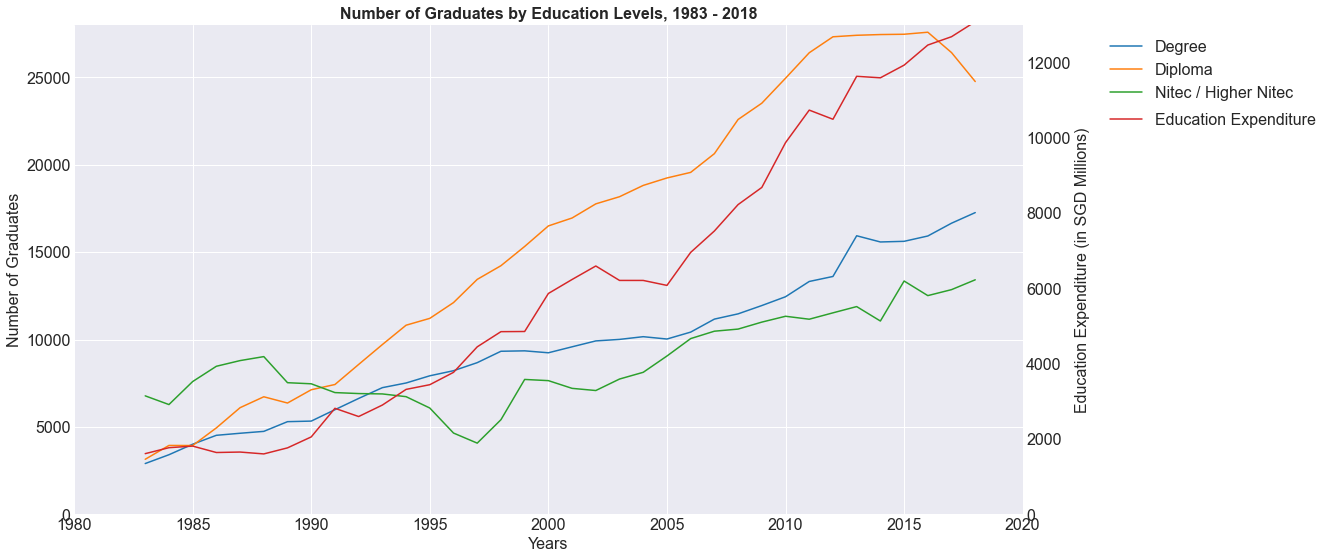

In [6]:
# Setting up the plots
plt.style.use("seaborn-dark")
fig, ax = plt.subplots(figsize=(17, 9))
ax1 = ax.twinx()

# Plot the data
ax.plot(education_graduates)
ax1.plot(education_expenditure, color="C3", label="Education Expenditure")

# Set details to make the graph easier to understand
# Graduates graph
ax.grid(True, linewidth=1)
ax.set_xlabel("Years")
ax.set_ylabel("Number of Graduates")
ax.set_xlim(roundNearestFloor(min_year_1), roundNearestCeil(max_year_1))
ax.set_ylim(roundNearestFloor(education_graduates_value_min, 1000), roundNearestCeil(education_graduates_value_max, 1000))
ax.set_yticks(np.arange(roundNearestFloor(education_graduates_value_min, 5000), roundNearestFloor(education_graduates_value_max, 5000)+1, 5000))
ax.set_title("Number of Graduates by Education Levels, {} - {}".format(min_year_1, max_year_1), fontdict={"fontweight": "bold"})
# Expenditure graph
ax1.set_ylabel("Education Expenditure (in SGD Millions)")
ax1.set_ylim(roundNearestFloor(education_expenditure_value_min, 1000), roundNearestFloor(education_expenditure_value_max, 1000))

# Show legend
ax.legend(education_graduates.columns, loc="upper right", bbox_to_anchor=(1.3, 1))
ax1.legend(loc="upper right", bbox_to_anchor=(1.324, 0.85))

# Show plot
plt.show()

From the line charts produced above, there are a few observations that could be made.

**Degrees**
* An overall increase in number of degree graduates from 1983 to 2018.
* The number of degree graduates start at 3rd highest and ends at 2nd highest.
* The 2nd highest overall increase in the number of diploma graduates.
* The increase in the number of degree graduates per year remains constant for the most part.
* The outlier for the constant increase is at around 2013. The rate of increase is increased more than normal for a while, but then the number of degree 
graduates decreased and the rate of increase returned to normal.

**Diplomas**
* An overall increase in number of diploma graduates from 1983 to 2018.
* The number of diploma graduates start at 2nd highest and ends at 1st highest.
* The 1st highest overall increase in the number of diploma graduates.
* The increase in the number of diploma graduates per year remains constant from around 1983 to around 2012. 
* After 2012, the number of diploma graduates remained about the same from around 2012 to around 2016. After that to 2018, the number of diploma graduates starts decreasing.

**Nitec / Higher Nitec**
* An overall increase in number of nitec / higher nitec graduates from 1983 to 2018.
* The number of nitec / higher nitec graduates start at 1sd highest and ends at 3rd highest.
* The 3rd highest overall increase in the number of nitec / higher nitec graduates.
* The number of nitec / higher nitec graduates has several significant increases and decreases.
* Periods with general, noticable increase: 1983-1987, 1996-1999, 2002-2018.
* Periods with general, noticable decrease: 1987-1995, 1999-2001.

**Education Expenditure**
* An overall increase in education expenditure from 1983 to 2018.
* The increase in education expenditure per year remains constant for the most part. 
* There are several outliers for the constant increase.

Insights gained:

* There is a correlation between education expenditure and the total number of graduates. As the education expenditure increases, the total number of graduates also increases.
* Another correlation between education expenditure and the total number of graduates. As the education expenditure increases, the average education level increases.
* There is a huge shift in popularity between education levels between the earlier and later years. 
    * Diplomas have become increasingly popular up until the last few years of the graph. 
    * Degrees have also become more popular, but not as much as diplomas have, even with similar numbers in graduates in 1983.
    * Nitec / Higher Nitec went from being the most popular to the least, with major decreases in number of graduates in some years.

### Distribution of Singaporeans' Education Levels

The second part of analysing the education of Singaporeans is to plot stacked bar charts for the percentage that each   make up as part of the total graduates over the years.

This requires us to further modify the data in the ```education_graduates``` dataframe, so that the number of graduates of various education levels are converted to be a percentage of the total number of graduates of each year.

1. Create a new dataframe, ```education_graduates_percentage```, that will initially be a copy of ```education_graduates``` dataframe.

2. A series of the total number of graduates for each year will be created by summing the values in each row. This can be done by calling the ```sum``` method on the ```education_graduates_percentage``` dataframe, specifying ```axis``` argument as columns.

3. The graduates of each education level for each year in the ```education_graduates``` dataframe will be divided by the series created in step 2, by calling the ```div``` method on ```education_graduates_percentage``` dataframe and specifying ```axis``` argument as the index.

4. The data in ```education_graduates_percentage``` will now add up to 1 across each row (each row being a year in the dataframe). It will be multiplied by 100 for the data to be converted to percentage figures.

5. The ```education_graduates_percentage``` will be transposed so that the years become the columns and the education levels become the index. This makes it so the structure of the dataframe more closely resemble how the graphs in the stacked bar charts will be plotted, which means plotting the dataframe as stacked bar charts becomes easier.

The resulting ```education_graduates_percentage``` can be seen below.

In [7]:
# Re-work data to contain percentage
education_graduates_percentage = education_graduates
education_graduates_percentage_yearly_sum = education_graduates_percentage.sum("columns")
education_graduates_percentage = education_graduates_percentage.div(education_graduates_percentage_yearly_sum, axis="index") * 100
education_graduates_percentage = education_graduates_percentage.transpose()

# Show modified dataframe
display(education_graduates_percentage)

year,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Degree,22.636952,25.009170,25.804169,25.203479,23.739571,23.154608,27.611707,26.762330,29.375399,29.980107,...,25.706847,25.544705,26.176211,25.941949,28.855622,28.806949,27.676800,28.425599,29.780844,31.136396
Diploma,24.538300,28.912039,25.321668,27.567176,31.233045,32.814558,33.163212,35.763384,36.445709,38.778371,...,50.626157,51.202249,51.890777,52.084008,49.625299,50.747620,48.671344,49.237963,47.234636,44.662435
Nitec / Higher Nitec,52.824749,46.078791,48.874164,47.229346,45.027384,44.030834,39.225081,37.474286,34.178892,31.241523,...,23.666997,23.253047,21.933012,21.974043,21.519079,20.445430,23.651857,22.336439,22.984520,24.201168


The minimum and maximum values of the data in the ```education_graduates_percentage``` dataframe is calculated. This is necessary to label the ticks on the graphs and plot the data correctly.

1. The minimum and maximum values in the dataframe will be calculated by first calling the dataframe ```min``` and ```max``` methods. This will return series objects of the minimum and maximum values in the dataframe.

2. The series ```min``` and ```max``` methods will be called again on the series objects, to return the true lowest values in the dataframes.

3. The minimum and maximum years in the dataframe will be calculated by calling the pandas ```min``` and ```max``` functions on its index. This will return the minimum and maximum years of the dataframes.

In [8]:
# Get min and max years of data collected for education_graduates_percentage dataset
education_graduates_percentage_value_min = education_graduates_percentage.min().min()
education_graduates_percentage_value_max = education_graduates_percentage.max().max()
education_graduates_percentage_year_min = education_graduates_percentage.columns.min()
education_graduates_percentage_year_max = education_graduates_percentage.columns.max()

Now that we have all the data we need, we can start with plotting the stacked bar charts.

A single graph would be most suitable to see the changes between years, but due to size limitations, it has been split into separate vertically stacked graphs.

1. Create a figure and subplots, by calling the matplotlib ```subplots``` function. The size is set by passing a tuple as a ```figsize``` argument.

2. Iterate over the subplots created.
    1. Slice the ```education_graduates_percentage``` dataframe by decades, starting from minimum year 1983.

    2. Iterate over the education levels in the ```education_graduates_percentage``` dataframe.

        1. Find the bottom y-coordinates on which to stack the bar charts.

        2. They are the top y-coordinates of the previous plotted bar charts. If it is the first iteration, the bottom is set to all 0s.
            * numpy ```array``` function is called to create nested arrays of those y-coordinates.

        3. Since it is possible there are already multiple plotted bar charts, those top y-coordinates of the previous plotted bar charts have to be summed.
            * Boolean indexing is used to extract the data from the nested arrays column by column.
            * numpy ```sum``` function is called to sum those columns to find the bottom y-coordinates for plotting the bar chart.
            * numpy ```append``` function is used to put those sums together.

        4. The bar charts are plotted by calling the matplotlib ```bar``` method on the subplot.

        5. Annotations are added to the bar charts to indicate their percentage figures.

        6. Calculations are done to with the width and height of the bars, by calling the ```get_width```, ```get_height```, and ```get_xy``` methods on the bars, to position the annotation text correctly.

        7. Standard matplotlib functions are used for improving the aesthetics of the graph, as well as providing important information to aid in its understanding. 
        
        8. The legend for the ```education_graduates_percentage``` dataframe is then set by calling the ```legends``` method on the subplot it is plotted on. It is moved to the right, out of the graph itself by specifying the ```loc``` and  ```bbox_to_anchor``` argument.
        
        9. Repeat those steps for every education level.

    3. Increase starting year by 10 to jump a decade in the dataframe.

    4. Repeat those steps for every subplot.

3. The last subplot is specially handled due to the years in the dataframe not splitting perfectly to decades.
    * Title of the subplot is changed to the maximum year of the dataframe, by calling the ```set_title``` method on the subplot.
    * The x axis is padded out to include 10 years, by calling ```set_xlim``` method on the subplot. This is to ensure the width of the bars remain consistent between subplots.

4. The graph is displayed by calling the matplotlib ```show``` function.

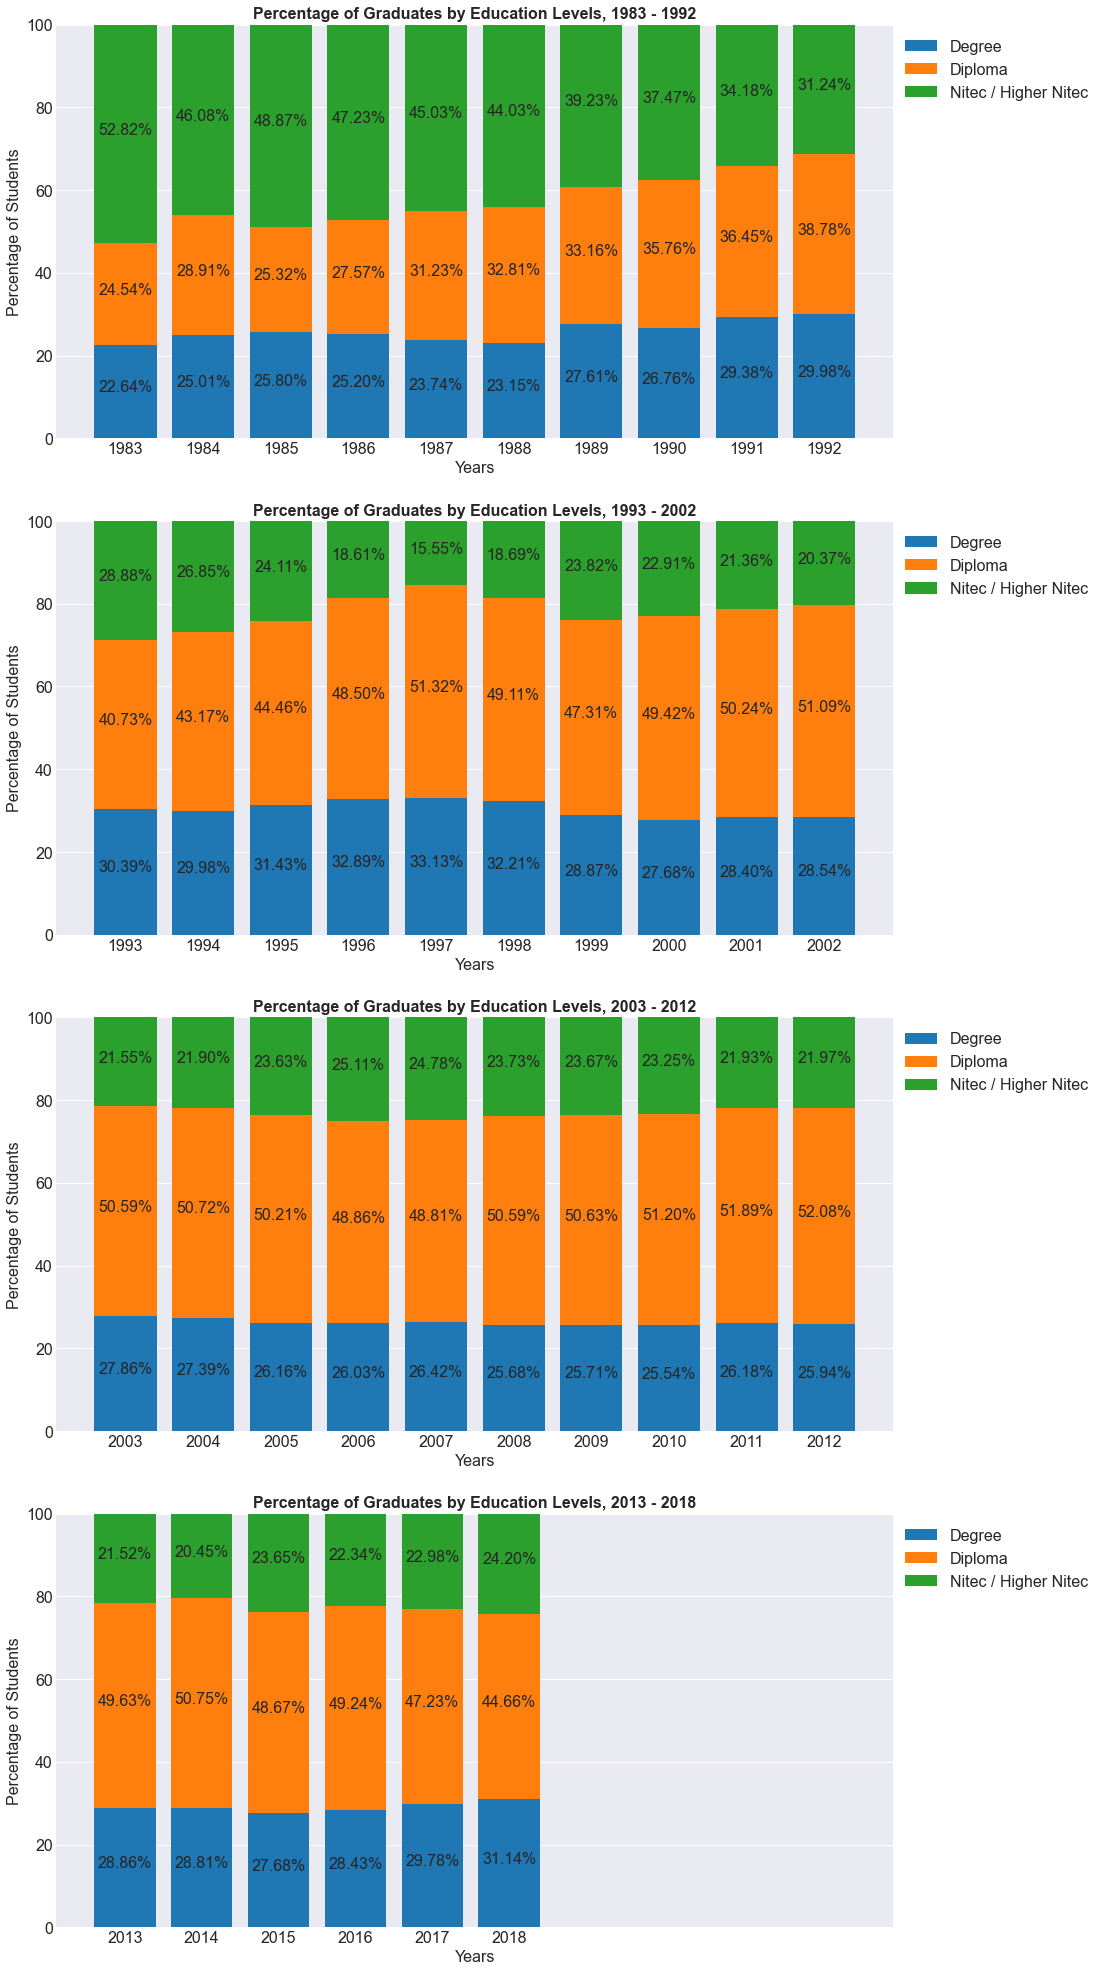

In [9]:
# Setting up the plots
plt.style.use("seaborn-dark")
num_rows = 4
num_cols = 1
fig, ax_list = plt.subplots(num_rows, num_cols, figsize=(15, 35))

# Plot the data
# Year at which to slice dataframe to get data to plot on subplots
year_index = education_graduates_percentage_year_min
# Iterate over every subplot
for ax in ax_list:
    # Slice dataframe by decades
    education_graduates_percentage_part = education_graduates_percentage.loc[:, str(year_index):str(year_index + 10 - 1)]
    # Iterating over education levels in sliced dataframe
    for i, education_level in enumerate(education_graduates_percentage_part.index):
        # Getting the bottom starting point of the bar charts
        bottoms = None
        if (i == 0):
            bottoms = np.array([[0] * len(education_graduates_percentage_part.columns)])
        else:
            bottoms = np.array(education_graduates_percentage_part.iloc[0:i, :])
        total_bottom = np.array([])
        for col_num in np.arange(len(education_graduates_percentage_part.columns)):
            total_bottom = np.append(total_bottom, bottoms[:, col_num].sum())  
        # Plotting the bar chart for the education_level
        bar = ax.bar(education_graduates_percentage_part.columns, education_graduates_percentage_part.loc[education_level, :], label=education_level, bottom=total_bottom)
        # Positioning and annotating the bar charts
        for sub_bar, percentage in zip(bar.patches, np.array(education_graduates_percentage_part.loc[education_level, :])): 
            center_width = sub_bar.get_width() * 0.5 + sub_bar.get_xy()[0]
            center_height = sub_bar.get_height() * 0.5 + sub_bar.get_xy()[1]
            ax.annotate("{:.2f}%".format(percentage), (center_width, center_height), ha="center")
    # Set details to make graph easier to understand
    ax.set_xticks(education_graduates_percentage_part.columns)
    ax.set_title("Percentage of Graduates by Education Levels, {} - {}".format(year_index, year_index + 10 - 1), fontdict={"fontweight": "bold"})
    ax.grid(True, linewidth=1)
    ax.set_xlabel("Years")
    ax.set_ylabel("Percentage of Students")
    ax.set_ylim(0, 100)
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
    # Increase year_index to access next part of dataframe
    year_index += 10

# Last subplot has to be specially handled
ax_last = ax_list[ax_list.size - 1]
ax_last.set_title("Percentage of Graduates by Education Levels, {} - {}".format(year_index - 10, education_graduates_percentage_year_max), fontdict={"fontweight": "bold"})
ax_last.set_xlim(year_index - 10 - 0.89, year_index) # lower xlim of other subplots start at XXXX.11

fontSizes(28)
fontSizes() # run 2nd time to reset

# Show plot
plt.show()

Note: Due to the rounding off of percentage figures to 2 decimal places, the annotated percentages on each bar may not add up to 100% exactly.

From the bar chart graphs produced there are a few observations that could be made:

* The percentage makeup of education levels among the graduates has a few noticeable changes from 1983 to 2018.

* Degree
    * The percentage of Degree graduates has a minor overall increase, with some minor decreases between years, from 1983 to 1997.
    * The percentage of Degree graduates has a steady overall decrease, with some minor increases between years, from 1997 to 2012.
    * The percentage of Degree graduates has a minor overall increase, with a minor decrease between years, from 2012 to 2018.

* Diploma
    * The percentage of Diploma graduates has a significant overall increase, with some minor decreases between years, from 1983 to 1997.
    * The percentage of Diploma graduates remained fairly constant, only with some minor fluctuations, from 1997 to 2016.
    * The percentage of Diploma graduates has a significant decrease, from 2016 to 2018.

* Nitec / Higher Nitec
    * The percentage of Nitec / Higher Nitec graduates has a significant overall decrease, with some minor increases between years, from 1993 to 1997.
    * The percentage of Nitec / Higher Nitec graduates has a steady overall increase, with some minor decreases between years, from 1997 to 2006.
    * The percentage of Nitec / Higher Nitec graduates has a steady overall decrease, from 2006 to 2014.
    * The percentage of Nitec / Higher Nitec graduates has a steady overall increase, with some a minor decrease between years, from 2014 to 2018.

* The percentage figures of education levels is largely as follows (from 1997 to 2017):
    * Degree graduates: 25% - 30%
    * Diploma graduates: 47% - 52%
    * Nitec / Higher Nitec graduates: 20% - 25%

Insights gained:

* The percentage makeup of the education levels of the graduates from 1983 to 2018 reflect the change in popularity between diplomas and nitec / higher nitec as already stated before.
* The percentage makeup of the degree graduates has been fairly constant compared to the other 2 education levels.
* The percentage makeup of the education levels of the graduates remained generally the same from 1996 to 2018.


### Conclusion

From the analysis of the education in Singapore, conclusions can be asked to answer the questions asked at the beginning of this data analysis.

#### How had the funding of education affected Singaporeans' education?

From the line chart graph plotted in the "Education Levels and Education Funding" section, it was found that as education expenditure increases, the total number of graduates and the average education level among graduates increases. 

This shows that more education funding has been increased to be able to cope with the increasing number of students over the years, and also increasing the quality of education that allows them to get higher education levels.

#### How had the distribution of Singaporeans' education levels changed over time?

From the stacked bar chart graph plotted in the "Distribution of Singaporeans' Education Levels" section, it was found that from 1983 onwards, the percentage figures of nitec / higher nitec graduates are decreasing while percentage figures of diploma graduates are increasing, and the percentage figures of degree graduates are also slightly increase. Eventually, the percentage figures of the education levels balances out at around 1997 and become constant afterwards with minor fluctuations.

The majority of Singaporeans are graduating with nitec / higher nitec at 53% in 1983. But over time a higher percentage Singaporeans started studying for diplomas instead, eventually making it the new majority education level Singaporeans are graduating with, up to around 50% in 1996. The proportion of Singaporeans graduating with degrees only increased slightly since 1983. The distribution of education levels remains generally the same from 1996 to 2018.

## Income

This section uses the "Average Monthly Household Income by Highest Qualification Attained of Main Income Earner and Type of Dwelling" dataset, from "Society" sector, and "Average Monthly Household Expenditure by Highest Qualification Attained of Main Income Earner and Type of Dwelling" dataset, from "Society" sector.

The "Average Monthly Household Income by Highest Qualification Attained of Main Income Earner and Type of Dwelling" dataset contains the average monthly income of households, categorised by the highest education level that their main income earner has attained, and also the type of housing that they live in, in 2013.

The "Average Monthly Household Expenditure by Highest Qualification Attained of Main Income Earner and Type of Dwelling" dataset contains the average monthly expenditure of households, categorised by the highest education level that their main income earner has attained, and also the type of housing that they live in, in 2013.

Important detail(s) to note:  
* Some households may have more than 1 main income earner. This may slightly increase the average household income, and affect the accuracy of this data analysis to a small extent.

The original datasets are displayed below:

In [10]:
# Show original datasets
display(income_average_income.head())
display(income_average_expenditure.head())

,year,level_1,level_2,value
0,2013,Total,Total,10503
1,2013,Total,No Qualification,1560
2,2013,Total,Primary,3087
3,2013,Total,Lower Secondary,4044
4,2013,Total,Secondary,6551


,year,level_1,level_2,value
0,2013,Total,Total,4724
1,2013,Total,No Qualification,1190
2,2013,Total,Primary,2045
3,2013,Total,Lower Secondary,2525
4,2013,Total,Secondary,3727


### Education Level and Income Correlation

The first part of analysing the income of Singaporeans is to plot several boxplots to visualse the range of income of Singaporeans of different education levels. This means plotting one boxplot of income range for every education level, on the same graph, side by side, so they can be compared.

The range of income of education levels are taken from the average incomes of households by the different housing types. The housing types are in different price ranges, so taking the average incomes of households by different housing types should give a representative range of incomes made by people of certain education levels. 

This requires us to perform data wrangling on the datasets, then modifying it by performing calculations on the data in it, so that it can be used to plot the graphs we want.

1. The dataframe ```rename``` method will be called on the ```income_average_income``` dataframe, to rename the column names to be more descriptive in the kind of data the column holds.

2. The ```year``` column wll be dropped from the ```income_average_income``` dataframe by calling the dataframe ```drop``` method, since the dataframe only contains data from 2013 and thus can be ignored.

3. The ```Housing Type``` and ```Education Level``` with "Total" entries will be removed from the ```income_average_income``` dataframe, by using boolean indexing to get entries in those columns that are not "Total".

4. The "Education Level" column unique entries in ```income_average_income``` dataframe will be spread into their own columns, and the "Housing Type" column unique entries spread into the index, by calling the dataframe ```pivot``` method. This is to re-structure the dataframe so it will be easier to create a boxplot graph out of it.

5. The columns and index in ```income_average_income``` dataframe will be re-arranged with lists that specify the order. Left to right columns for increasing educaton levels, and top to bottom for increasing price ranges of housing types. This can be done by using boolean indexing for the columns and calling the dataframe ```reindex``` method for the index (as well as ```astype``` method after to change datatype back from floats to integers). This is done to make the dataframe easier to read.

The resulting modified ```income_average_income``` dataframe can be seen below.

Extra information is also shown, that can be used to reflect the values in the boxplot that will be plotted later.

In [11]:
# Rename columns to be more descriptive and remove unneccessary columns
income_average_income = income_average_income.rename({"level_1": "Housing Type", "level_2": "Education Level", "value":"Income"}, axis="columns")
income_average_income = income_average_income.drop("year", axis="columns")

# Filter out unneccessary data and change the structure
income_average_income = income_average_income[(income_average_income["Housing Type"] != "Total") & (income_average_income["Education Level"] != "Total")]
income_average_income = income_average_income[income_average_income["Housing Type"] != "HDB Dwellings - Total HDB"]
income_average_income = income_average_income.pivot(index="Housing Type", columns="Education Level", values="Income")

# Re-arrange the columns. Increasing education level: left to right, Increasing price range of housing type: top to bottom
education_level_tiers = ["No Qualification", "Primary", "Lower Secondary", "Secondary", "Post Secondary (Non-Tertiary)", "Professional Qualification & Other Diploma", "Polytechnic", "University"]
income_average_income = income_average_income[education_level_tiers]
housing_type_tiers = ["HDB Dwellings - 1- & 2-Room Flats", "HDB Dwellings - 3-Room Flats", "HDB Dwellings - 4-Room Flats", "HDB Dwellings - 5-Room & Executive Flats", "Condominiums & Other Apartments", "Landed Properties"]
income_average_income = income_average_income.reindex(housing_type_tiers).astype("int64")

# Show modified dataframe
display(income_average_income)
display(income_average_income.describe())

Education Level,No Qualification,Primary,Lower Secondary,Secondary,Post Secondary (Non-Tertiary),Professional Qualification & Other Diploma,Polytechnic,University
Housing Type,,,,,,,,
HDB Dwellings - 1- & 2-Room Flats,1025,1389,1547,2291,2615,3476,4419,4624
HDB Dwellings - 3-Room Flats,1400,2419,2813,4064,5189,6769,6616,9427
HDB Dwellings - 4-Room Flats,1896,4072,4735,6107,6594,8124,8934,11987
HDB Dwellings - 5-Room & Executive Flats,3602,4114,6118,7931,8258,9860,11360,14223
Condominiums & Other Apartments,2164,6787,10826,11231,12690,17218,16779,23809
Landed Properties,5996,6861,12663,21560,20660,19393,27523,29482


Education Level,No Qualification,Primary,Lower Secondary,Secondary,Post Secondary (Non-Tertiary),Professional Qualification & Other Diploma,Polytechnic,University
count,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000
mean,2680.500000,4273.666667,6450.333333,8864.00000,9334.333333,10806.666667,12605.166667,15592.000000
std,1849.555379,2228.828900,4428.755386,6949.92046,6488.950198,6212.320329,8460.188920,9312.632539
min,1025.000000,1389.000000,1547.000000,2291.00000,2615.000000,3476.000000,4419.000000,4624.000000
25%,1524.000000,2832.250000,3293.500000,4574.75000,5540.250000,7107.750000,7195.500000,10067.000000
50%,2030.000000,4093.000000,5426.500000,7019.00000,7426.000000,8992.000000,10147.000000,13105.000000
75%,3242.500000,6118.750000,9649.000000,10406.00000,11582.000000,15378.500000,15424.250000,21412.500000
max,5996.000000,6861.000000,12663.000000,21560.00000,20660.000000,19393.000000,27523.000000,29482.000000


Now that we have all the data we need, we can start with plotting the boxplots.

1. Change style to seaborn darkgrid to draw gridlines into the graph.

2. Plot the ```income_average_income``` dataset, by calling the seaborn ```catplot``` function. The ```kind``` argument is set as "box" to create a boxplot. The size of the graph is set by specifying the ```height``` and ```aspect``` arguments. The ```whis``` argument is set to determine at what range data is considered outlier.

4. Standard seaborn functions are used for improving the aesthetics of the graph, as well as providing important information to aid in its understanding. 

6. The graph is displayed by calling the matplotlib ```show``` function.

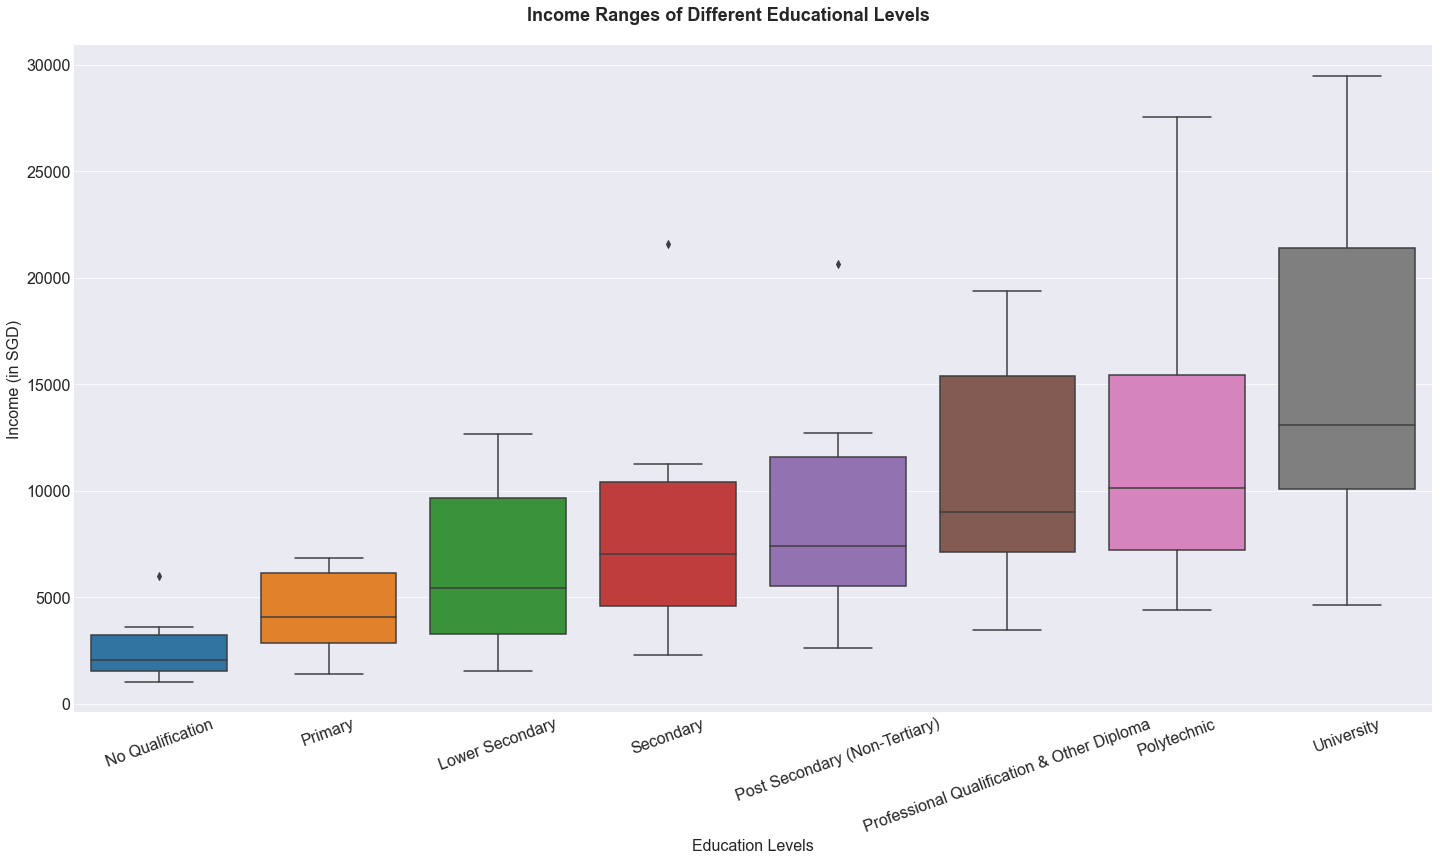

In [12]:
# Plot the data
sns.set_style("darkgrid")
g = sns.catplot(data=income_average_income, kind="box", whis=1.5, height=10, aspect=2) #set whis to 1.5 if want to show outliers, 1.92 to hide

# Set details to make the graph easier to understand
sns.set_context("talk", rc={"lines.linewidth": 0.8})
g.fig.suptitle("Income Ranges of Different Educational Levels", y=1.03, size=18, weight="bold")
g.set(xlabel="Education Levels", ylabel="Income (in SGD)")
g.ax.tick_params(axis="x", rotation=20)

# Show plot
plt.show()



The black rhombus in the graphs represents the new lower or upper range if outlier present data had been included into the boxplots.

From the boxplots produced, there are a few observations that could be made: 

* The difference between the lower and upper ends of the range of income of different education qualifications are increasing as the tiers of education level increases.
    * The increase is mostly constant. However, "Secondary" and "Post Secondary (Non-Tertiary)" boxplots are anomalies. The rhombis above their boxplots show that their upper range would be higher than that of the boxplot of the tier of education level above them, "Professional Qualification & Other Diploma". 

    * This can be verified be checking the standard deviation and maximum values rows in the table above. 

* The interquartile range of range of incomes of different education qualifications are increasing as the tiers of education level increases.
    * The increase is mostly constant. However, "Lower Secondary" boxplot is an anomaly. It's interquartile range is larger than the boxplot of the tier of education level above it, "Secondary". 

    * Also for "Professional Qualification & Other Diploma" and "Polytechnic" boxplots, the interquartile range is almost the same, unlike other boxplots.
    
    * This can be verified be checking the difference between the minimum and maximum values rows in the table above. 

* The median of range of incomes of different educational qualifications are increasing as the tiers of education level increases. 
    * The increase is always constant without any anomalies in the graph.

Insights gained:

* The outliers seems to mostly belong to the "Landed Properties" data.

* Generally, the income of Singaporeans increases along with increases in their education level.

* Generally, the income gap between Singaporeans of the same education level increases along with increases in their education level.

### Income's Affects on Expenditure

The second part of analysing the income of Singaporeans is to plot a scatterplot graph to visualise how the expenditure of Singaporeans change as their incomes increase. The dots would be coloured differently according to education level and housing type, so those factors can also be studied at the same time. 

This requires us to perform data wrangling on the datasets, then modifying it by performing calculations on the data in it, so that it can be used to plot the graphs we want.

1. We will start by re-reading the "Average Monthly Household Income by Highest Qualification Attained of Main Income Earner and Type of Dwelling" dataset to reset the ```income_average_income``` dataframe. This will be done by calling the pandas read_csv function on the dataset.

2. Perform the same operations as before in the previous part of this section on the ```income_average_income``` dataframe, stopping short of pivoting it.

3. The same operations performed in step 2 will be repeated on the ```income_average_expenditure``` dataframe.

4. The expenditure to income ratio is then calculated by taking the ```income_average_expenditure``` dataframe's ```Expenditure``` column as a series, and dividing it by the ```income_average_income``` dataframe's ```Income``` column as a series, to make the ```income_income_expenditure_ratio``` series.

5. The index of ```income_income_expenditure_ratio``` series will be reset by calling ```reset_index``` method on it.

The resulting dataframes are shown below.

In [13]:
# Reset income_average_income dataset
income_average_income = pd.read_csv("datasets/income/average-mhi-by-highest-qualification-attained-of-main-income-earner-and-type-of-dwelling.csv")

# Rename columns to be more descriptive and remove unneccessary columns
income_average_income = income_average_income.rename({"level_1": "Housing Type", "level_2": "Education Level", "value":"Income"}, axis="columns")
income_average_income = income_average_income.drop("year", axis="columns")

# Filter out unneccessary data and change the structure
income_average_income = income_average_income[(income_average_income["Housing Type"] != "Total") & (income_average_income["Education Level"] != "Total")]
income_average_income = income_average_income[income_average_income["Housing Type"] != "HDB Dwellings - Total HDB"]

# Rename columns to be more descriptive and remove unneccessary columns
income_average_expenditure = income_average_expenditure.rename({"level_1": "Housing Type", "level_2": "Education Level", "value":"Expenditure"}, axis="columns")
income_average_expenditure = income_average_expenditure.drop("year", axis="columns")

# Filter out unneccessary data and change the structure
income_average_expenditure = income_average_expenditure[(income_average_expenditure["Housing Type"] != "Total") & (income_average_expenditure["Education Level"] != "Total")]
income_average_expenditure = income_average_expenditure[income_average_expenditure["Housing Type"] != "HDB Dwellings - Total HDB"]

# Get ratios of income to expenditure
income_income_expenditure_ratio = (income_average_expenditure["Expenditure"] / income_average_income["Income"]).reset_index(drop=True)

# Show modified dataframe
display(income_average_income.head())
display(income_average_expenditure.head())

,Housing Type,Education Level,Income
19,HDB Dwellings - 1- & 2-Room Flats,No Qualification,1025
20,HDB Dwellings - 1- & 2-Room Flats,Primary,1389
21,HDB Dwellings - 1- & 2-Room Flats,Lower Secondary,1547
22,HDB Dwellings - 1- & 2-Room Flats,Secondary,2291
23,HDB Dwellings - 1- & 2-Room Flats,Post Secondary (Non-Tertiary),2615


,Housing Type,Education Level,Expenditure
19,HDB Dwellings - 1- & 2-Room Flats,No Qualification,816
20,HDB Dwellings - 1- & 2-Room Flats,Primary,986
21,HDB Dwellings - 1- & 2-Room Flats,Lower Secondary,1114
22,HDB Dwellings - 1- & 2-Room Flats,Secondary,1465
23,HDB Dwellings - 1- & 2-Room Flats,Post Secondary (Non-Tertiary),1911


Now to put the data we gathered together into one dataset.

1. Merge the ```income_average_income``` dataframe and ```income_average_expenditure``` dataframe together by calling ```merge``` method on ```income_average_income``` dataframe, so that the average income and exoenditure for each year can be compared.

2. Take the ```income_income_expenditure_ratio``` series and insert next to ```Expenditure``` column of ```income_income_expenditure_ratio``` dataframe, by calling the ```insert``` method on the ```income_average_income_expenditure``` dataframe.

The resulting modified ```income_average_income_expenditure``` dataframe can be seen below.

Extra information is also shown, that can be used to reflect the values in the scatterplot that will be plotted later.

In [14]:
# Put income and expenditure together
income_average_income_expenditure = income_average_income.merge(income_average_expenditure)
income_average_income_expenditure.insert(len(income_average_income_expenditure.columns), "Ratio", income_income_expenditure_ratio)

# Show resulting dataset
display(income_average_income_expenditure)
display(income_average_income_expenditure.sort_values("Ratio"))

,Housing Type,Education Level,Income,Expenditure,Ratio
0,HDB Dwellings - 1- & 2-Room Flats,No Qualification,1025,816,0.796098
1,HDB Dwellings - 1- & 2-Room Flats,Primary,1389,986,0.709863
2,HDB Dwellings - 1- & 2-Room Flats,Lower Secondary,1547,1114,0.720103
3,HDB Dwellings - 1- & 2-Room Flats,Secondary,2291,1465,0.639459
4,HDB Dwellings - 1- & 2-Room Flats,Post Secondary (Non-Tertiary),2615,1911,0.730784
5,HDB Dwellings - 1- & 2-Room Flats,Polytechnic,4419,2064,0.467074
6,HDB Dwellings - 1- & 2-Room Flats,Professional Qualification & Other Diploma,3476,2510,0.722094
7,HDB Dwellings - 1- & 2-Room Flats,University,4624,2055,0.444420
8,HDB Dwellings - 3-Room Flats,No Qualification,1400,1206,0.861429
9,HDB Dwellings - 3-Room Flats,Primary,2419,1521,0.628772


,Housing Type,Education Level,Income,Expenditure,Ratio
45,Landed Properties,Polytechnic,27523,9472,0.344149
39,Condominiums & Other Apartments,University,23809,8490,0.356588
47,Landed Properties,University,29482,11073,0.375585
15,HDB Dwellings - 3-Room Flats,University,9427,3618,0.383791
23,HDB Dwellings - 4-Room Flats,University,11987,4824,0.402436
31,HDB Dwellings - 5-Room & Executive Flats,University,14223,5981,0.420516
37,Condominiums & Other Apartments,Polytechnic,16779,7263,0.432863
7,HDB Dwellings - 1- & 2-Room Flats,University,4624,2055,0.444420
38,Condominiums & Other Apartments,Professional Qualification & Other Diploma,17218,7700,0.447206
42,Landed Properties,Lower Secondary,12663,5699,0.450051


Now that we have all the data we need, we can start with plotting the scatterplot.

1. Change style to seaborn darkgrid to draw gridlines into the graph.

2. Plot the ```income_average_income_expenditure``` dataset, by calling the seaborn ```relplot``` function. The ```kind``` argument is set as "scatter" to create a scatterplot. The size of the graph is set by specifying the ```height``` and ```aspect``` arguments. The ```x``` and ```y``` arguments are specified to set variables on the axis. Other arguments are set to help differentiate the education level and housing type of the data.

3. Plot the best fit line through the scatterplot, by calling the seaborn ```lineplot``` function, giving it the average income and expenditure data as arguments.

4. Standard seaborn functions are used for improving the aesthetics of the graph, as well as providing important information to aid in its understanding. 

5. The graph is displayed by calling the matplotlib ```show``` function.

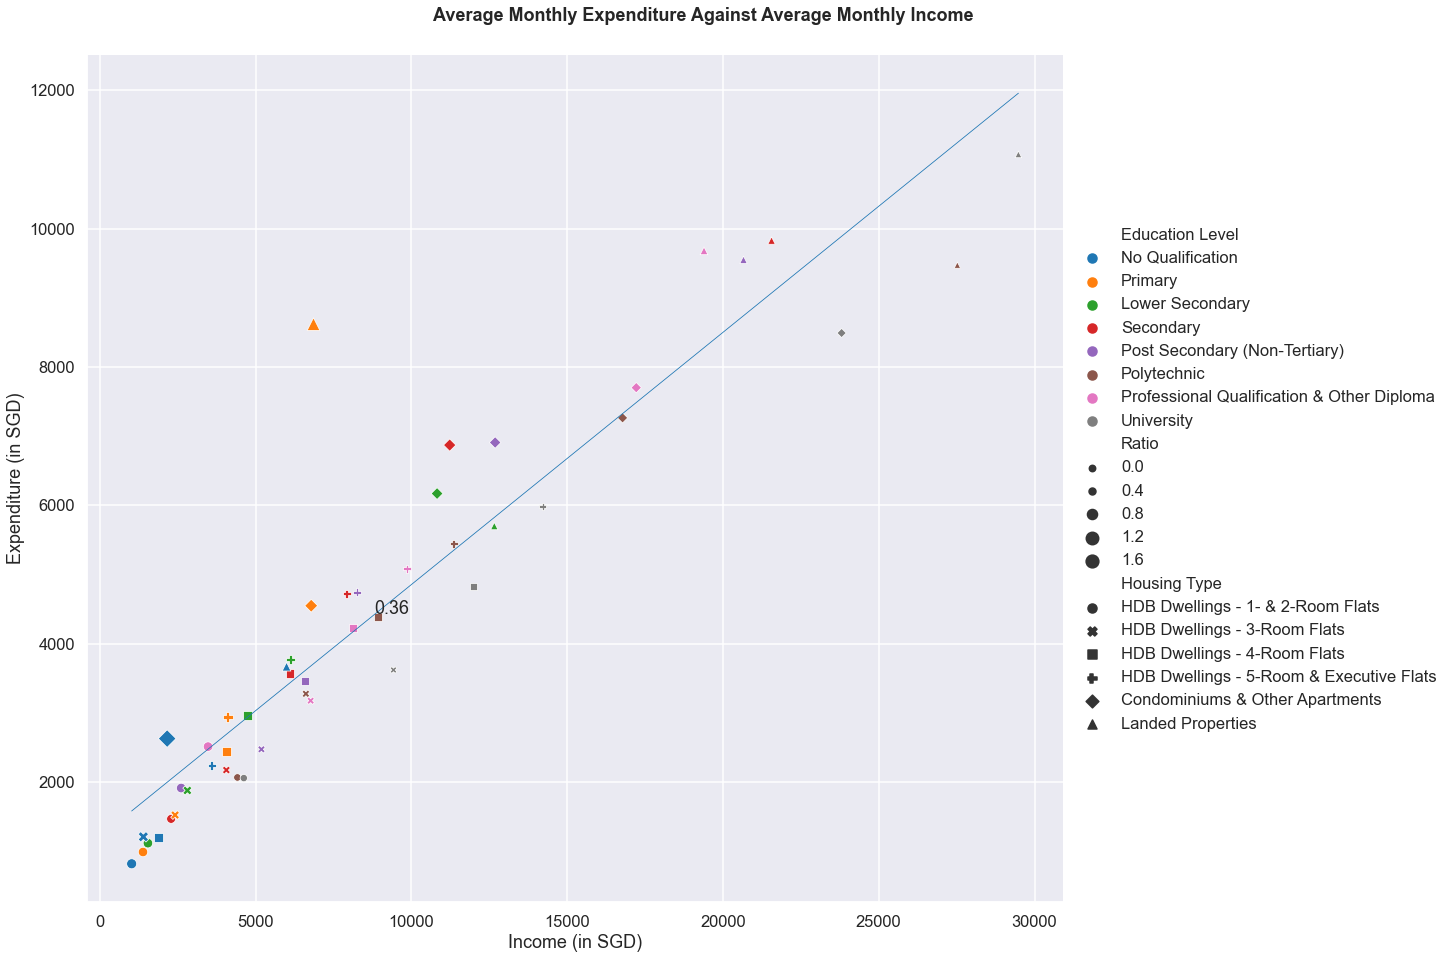

In [15]:
# Provide y-values for the average line through scatter plots
def scatter_plot_line (x, y):
    p = np.poly1d(np.polyfit(x, y, 1))
    return p(x)

# Gives the range between the lowest and highest value in series objects
def get_range(x):
    return (x.max() - x.min())

# Plot the data
sns.set_style("darkgrid")
g = sns.relplot(data=income_average_income_expenditure, kind="scatter", x="Income", y="Expenditure", hue="Education Level", style="Housing Type", size="Ratio", legend="brief", height=13, aspect=1.2)

# Plot best fit line through scatterplot
averageY = scatter_plot_line(income_average_income_expenditure.loc[:, "Income"], income_average_income_expenditure.loc[:, "Expenditure"])
sns.lineplot(x=income_average_income_expenditure.loc[:, "Income"], y=averageY, legend=False)

# Set details to make the graph easier to understand
sns.set_context(rc={"lines.linewidth": 0.8})
g.fig.suptitle("Average Monthly Expenditure Against Average Monthly Income", y=1.03, size=18, weight="bold")
g.set(xlabel="Income (in SGD)", ylabel="Expenditure (in SGD)")
g.ax.annotate(str(round(get_range(averageY) / get_range(income_average_income_expenditure["Income"]), 2)), (income_average_income_expenditure["Income"].mean(), averageY.mean()))

# Show plot
plt.show()


The education levels of the data are differentiated using different colours for the scatter points.
The housing types of the data are differentiated using different shapes for the scatter points.
The expenditure-to-income ratios of the data are differentiated using different sizes for the scatter points.

From the scatterplot produced, there are a few observations that could be made: 

* The best fit line has a positive gradient, increasing expenditure for increasing income.

* The gradient of the best fit line is 0.36. 

* For the most part, regardless of education level or housing type, the increase of income and increase of expenditure is quite consistent, following the path of the best fit line.

* The most noticeable outlier is the yellow triangle. Education level primary, Housing type landed properties.

* The bigger scatter points belong to data with expensive housing types but low education level.

Insights gained:

* Generally, as the incomes of Singaporeans increase, so do their expenditure.

* On average, an increase of SGD100 in income results in an increase of SGD36 in expenditure.

* The education level and housing type do not influence much on the trend stated above.

* Low educational level often results in lower paying jobs, so some Singaporeans would be paying a higher proportion of their income on more expensive things like expnensive housing types.

### Conclusion

From the analysis of the income in Singapore, conclusions can be asked to answer the questions asked at the beginning of this data analysis.

#### How does the education level correlate with the income of Singaporeans?

From the boxplot graph plotted in the "Education Level and Income Correlation" section, the higher the education levels of Singaporeans, the higher their average income is, and the higher the income gap between Singaporeans of the same education level.

This shows that higher tiers of education levels generally result in more income, and also that income for people in higher tiers of education levels are more spread out.

#### How does the income of Singaporeans affect their expenditure?

From the scatterplot graph plotted in the "Income's Affects on Expenditure" section, generally an increase in income also leads to an increase in expenditure. 

An increase in income leads to an increase in expenditure, generally. Approximately a 36SGD increase in expenditure for every 100SGD increase in income. In addition, the graph showed that the housing type or education level do not influence much on the increase between income and expenditure. 

Upon analysis with the expenditure-to-income ratios calculated, it is found that the higher ratios belong to expensive housing types but low educational levels, so they have to spend higher proportions out of their generally low incomes.

## Economy

This section uses the "Gross Domestic Product At Current Prices, By Detailed Industry, Annual" dataset, from "Economy" sector, "Consumer Price Index, Base Year 2014 = 100, Monthly" dataset, from "Economy" sector, and "Assessable Income of Individuals" dataset, from "Finance" sector.

The "Gross Domestic Product At Current Prices, By Detailed Industry, Annual" dataset contains the amount of money each industry has contributed towards Singapore's Gross Domestic Product (GDP), in millions of SGD, for each year, from 1960 to 2018.

The "Consumer Price Index, 2019 as Base Year" dataset contains the percentage change in Consumer Price Index (CPI) and MAS core inflation measure, both data used to measure the rate of inflation, relative to their 2019 figures, for each year, from 1961 to 2019.

The "Assessable Income of Individuals" dataset contains the total amount of income, in thousands of SGD, of assessable individuals in Singapore, for each year, from 2004 to 2018.

Important detail(s) to note: 
* For "Consumer Price Index, Base Year 2014 = 100, Monthly" dataset", only the CPI "All Items" Measure will be used, for the sake of simplicity.
* For "Assessable Income of Individuals" dataset, the "Total Income" column will be used instead of the "Assessable Income" column as it includes the approved donations, which is made up of tax deductions.

The original datasets are displayed below:ts are displayed below:

In [16]:
display(economy_gdp.head())
display(economy_cpi.head())
display(economy_total_income.head())

,year,level_1,level_2,level_3,value
0,1960,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,228.2
1,1960,GDP At Current Market Prices,Goods Producing Industries,Construction,67.7
2,1960,GDP At Current Market Prices,Goods Producing Industries,Utilities,57.0
3,1960,GDP At Current Market Prices,Goods Producing Industries,Other Goods Industries,79.9
4,1960,GDP At Current Market Prices,Services Producing Industries,Wholesale & Retail Trade,601.5


,month,level_1,value
0,1961-01,All Items,24.542
1,1961-01,All Items Less Imputed Rentals On Owner-occupi...,na
2,1961-01,All Items Less Accommodation,na
3,1961-02,All Items,24.565
4,1961-02,All Items Less Imputed Rentals On Owner-occupi...,na


,year_of_assessment,no_of_indv_assessed,total_income,donations,assessable_income
0,2004,1734218,71878947,254217,71624730
1,2005,1528861,71594148,247025,71347123
2,2006,1461040,75480305,323978,75156326
3,2007,1522175,84724808,282038,84442770
4,2008,1616707,98848536,357352,98491184


### Average Income and Inflation

The first part of analysing the economy of Singapore is to plot line charts of the average income of Singaporeans and the CPI percentage relative to 2019 over time, to compare how they change over time.

This is to find out how well the income of Singaporeans keeps up with the inflation in Singapore.

This requires us to perform data wrangling on the datasets, then modifying it by performing calculations on the data in it, so that it can be used to plot the graphs we want.

1. We will start by renaming the ```economy_cpi``` dataframe column names to be more descriptive, by calling the ```rename``` method on it.

2. The ```fillna``` method will be called on the ```economy_cpi``` dataframe to fill up any missing data with 0.

3. Filter for "All Items" measure in ```Measure``` column by boolean indexing, then calling drop method on  ```economy_cpi``` dataframe to remove ```Measure``` column since it would not be needed anymore. 

4. Convert the CPI percentage in ```CPI``` column from strings to floats, by calling the ```astype``` method on the ```economy_cpi``` dataframe ```CPI``` column. This is to make it so the CPI percentages can be plotted later on.

5. Convert the months in ```Month``` column to be datetime, by calling the pandas ```to_datetime``` function on the ```economy_cpi``` dataframe ```Month``` column. This is to make it so the data of a certain time period can be accessed more easily later on.

6. Find the minimum and maximum year of the dataset by calling the ```min``` and ```max``` methods on the years in the dataframe. The years in the dataframe can be collected by accessing the ```year``` property of the ```datetime``` objects in the ```Month``` column.

7. Create another dataframe from a dictionary, ```economy_cpi_annual```, by calling the pandas dataframe ```from_dict``` function. Fill it with data of mean CPI of each year. For every year between the minimum and maximum year of the dataframe:
    * Get the CPIs of all months in the year and calculate the mean of the CPI of the year. This can be done by boolean indexing for all months in a year, which gives a series of all CPIs in the year. Then call the ```mean``` method on the series to get the mean CPI of the year.
    * Create another dataframe from a dictionary, ```economy_cpi_annual_row```, by calling the pandas dataframe ```from_dict``` function. Fill it with the mean CPI of the year.
    * Append the ```economy_cpi_annual_row``` dataframe to the ```economy_cpi_annual``` dataframe to add it as a new row for mean CPI of a year.
    * Repeat the steps for all years.

8. Convert the ```year``` column in the ```economy_cpi_annual``` dataframe from floats to integers, by calling the ```astype``` method on it.

9. Make the ```year``` column in the ```economy_cpi_annual``` dataframe the index of the dataframe, by calling the ```set_index``` method on it.

10. Assign the ```economy_cpi_annual``` dataframe back to ```economy_cpi```.

The resulting dataframe is shown below.

In [17]:
# Renaming the dataframe columns to be more descriptive
economy_cpi = economy_cpi.rename({"month": "Month", "level_1": "Measure", "value": "CPI"}, axis="columns")

# Fill missing data, and filter out unneccessary data
economy_cpi = economy_cpi.fillna(0)
economy_cpi = economy_cpi[economy_cpi["Measure"] == "All Items"]
economy_cpi = economy_cpi.drop("Measure", axis="columns")

# Convert all values in dataframe to appropriate datatypes
economy_cpi["CPI"] = economy_cpi["CPI"].astype("float64")
economy_cpi["Month"] = pd.to_datetime(economy_cpi["Month"])

# Get minimum and maximum year of dataframe
economy_cpi_year_min = economy_cpi["Month"].dt.year.min()
economy_cpi_year_max = economy_cpi["Month"].dt.year.max()

# Create another dataframe of mean CPI percentage each year
economy_cpi_annual = pd.DataFrame.from_dict({"Year": [], "CPI": []})
for year in np.arange(economy_cpi_year_min, economy_cpi_year_max + 1):
    economy_cpi_mean_year = economy_cpi[economy_cpi["Month"].dt.year == year].mean().values[0]
    economy_cpi_annual_row = pd.DataFrame.from_dict({"Year": [year], "CPI": [economy_cpi_mean_year]})
    economy_cpi_annual = economy_cpi_annual.append(economy_cpi_annual_row)

# Set year in new dataframe as the index
economy_cpi_annual["Year"] = economy_cpi_annual["Year"].astype("int64")
economy_cpi_annual = economy_cpi_annual.set_index("Year")

# Show modified dataframe
economy_cpi = economy_cpi_annual
display(economy_cpi.tail())

,CPI
Year,
2016,98.436417
2017,99.003667
2018,99.437917
2019,100.000000
2020,100.204000


1. We will start by renaming the ```economy_total_income``` dataframe column names to be more descriptive, by calling the ```rename``` method on it.

2. Set the ```year``` column to be the index, by calling the ```set_index``` method on the ```economy_total_income``` dataframe.

3. Drop the ```Donations``` and ```Assessable Income``` columns from the ```economy_total_income``` dataframe, by calling the ```drop``` method on it.

4. Convert the total income for each year from thousands of SGD to SGD, by multiplying all values in ```Total Income``` column by 1000.

5. Create a new dataframe, ```economy_average_income```, a copy of the ```economy_total_income``` dataframe. This will be used to hold average incomes of each year, calculated in the next step.

6. Calculate the average income of each year by dividing the ```Total Income``` column of the ```economy_total_income``` dataframe by the ```No. of Individuals``` column of the same dataframe. This creates a series of average incomes of each year, which can be added as a column to the ```economy_average_income``` dataframe by calling the ```insert``` method on it.

The modified dataframe is shown below.

In [18]:
# Renaming the dataframe columns to be more concise
economy_total_income = economy_total_income.rename({"year_of_assessment": "Year", "no_of_indv_assessed": "No. of Individuals", "total_income": "Total Income", "donations": "Donations", "assessable_income": "Assessable Income"}, axis="columns")

# Set year in new dataframe as the index
economy_total_income = economy_total_income.set_index("Year")

# Removing unneccessary data and converting income to SGD
economy_total_income = economy_total_income.drop(["Donations", "Assessable Income"], axis="columns")
economy_total_income["Total Income"] *= 1000

# Calculate average income of each year
economy_average_income = economy_total_income.drop(["No. of Individuals", "Total Income"], axis="columns")
economy_average_income.insert(len(economy_average_income.columns), "Average Income", economy_total_income["Total Income"] / economy_total_income["No. of Individuals"])

# Show modified dataframe
display(economy_average_income)

,Average Income
Year,
2004,41447.469119
2005,46828.421943
2006,51662.038685
2007,55660.359683
2008,61141.898934
2009,64746.528840
2010,62359.573564
2011,66145.637367
2012,68439.926750


1. Call the ```merge``` method on ```economy_cpi``` dataframe to merge it with ```economy_average_income``` dataframe, to create a new dataframe ```economy_cpi_income```.

2. Get the minimum and maximum common years between the 2 original dataframes, by calling the ```min``` and ```max``` methods on the index of the merged ```economy_cpi_income``` dataframe.

3. Change the CPI and average income data so they are relative to the minimum common year of the dataframes (2004). This can be done by specifying the columns in the ```economy_cpi_income``` dataframe, then multiplying by 100, then dividing it by the value in the minimum common year.

The modified dataframe is shown below.

In [19]:
# Very inefficient
#economy_cpi_income["Average Income"] = economy_cpi_income["Average Income"].apply(lambda x: x * 100 / economy_cpi_income.loc[2018, "Average Income"])

# Merge both dataframes to find common years
economy_cpi_income = economy_cpi.merge(economy_average_income, left_index=True, right_index=True)

# Get minimum and maximum years
economy_cpi_income_year_min = economy_cpi_income.index.min()
economy_cpi_income_year_max = economy_cpi_income.index.max()

# Re-adjust CPI data so its relative to max year of dataframe instead
economy_cpi_income["CPI"] *= (100 / economy_cpi_income.loc[economy_cpi_income_year_min, "CPI"])

# Re-adjust average income data so its relative to max year of dataframe
economy_cpi_income["Average Income"] *= (100 / economy_cpi_income.loc[economy_cpi_income_year_min, "Average Income"])

# Show modified dataframe
display(economy_cpi_income)

,CPI,Average Income
Year,,
2004,100.000000,100.000000
2005,100.468733,112.982585
2006,101.436148,124.644616
2007,103.571257,134.291335
2008,110.435734,147.516604
2009,111.094727,156.213468
2010,114.231666,150.454479
2011,120.226307,159.589087
2012,125.727386,165.124501


1. Modify the dataframe such that the values contain only the percentage increases or decreases over time, by subtracting the values in the columns by 100%. 

In [20]:
# Get percentage increases.
economy_cpi_income["CPI"] -= 100
economy_cpi_income["Average Income"] -= 100


Now that we have all the data we need, we can start with plotting the line charts.

1. Change style to seaborn darkgrid to draw gridlines into the graph.

2. Plot the ```income_average_income_expenditure``` dataset, by calling the seaborn ```relplot``` function. The ```kind``` argument is set as "line" to create line charts. The size of the graph is set by specifying the ```height``` and ```aspect``` arguments. Other arguments are set to help further differentiate the CPI and average income line charts.

3. Standard seaborn functions are used for improving the aesthetics of the graph, as well as providing important information to aid in its understanding. 

5. The graph is displayed by calling the matplotlib ```show``` function.

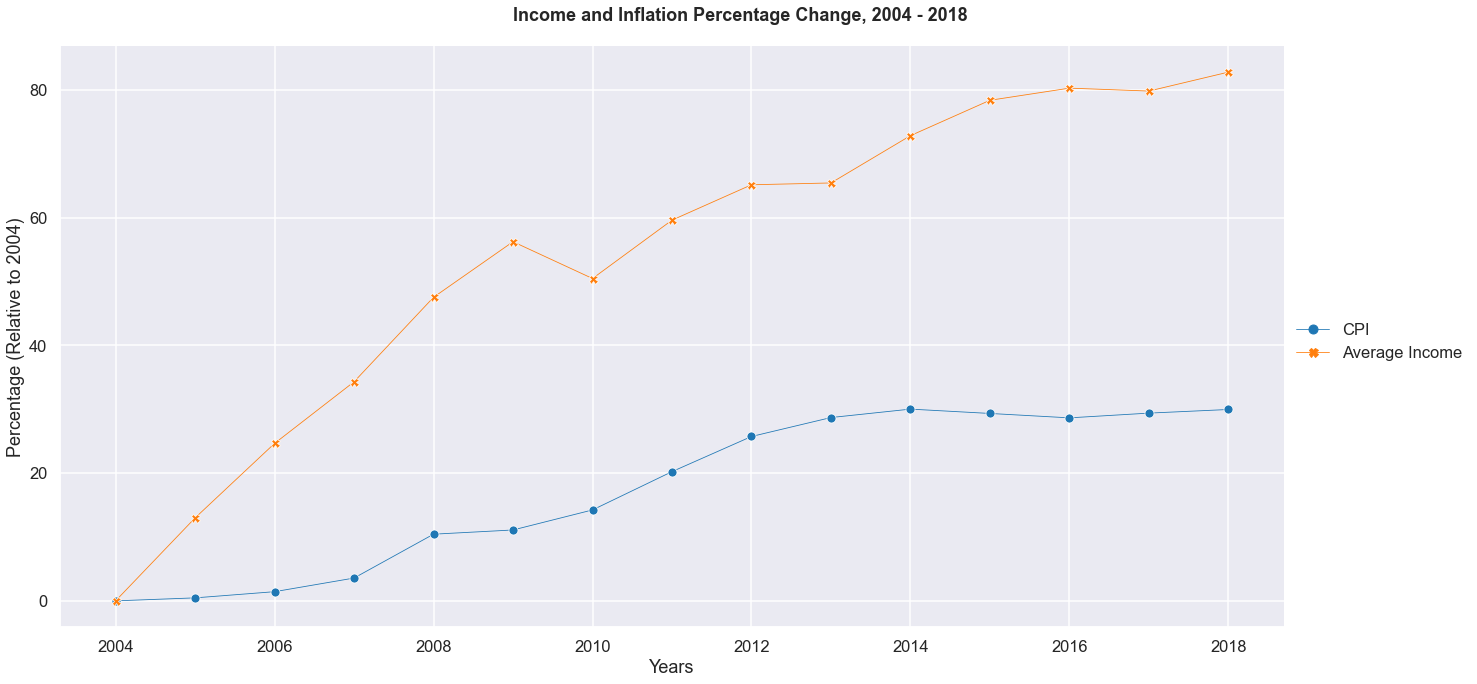

In [21]:
# Plot the data
sns.set_style("darkgrid")
g = sns.relplot(data=economy_cpi_income, kind="line", markers=True, dashes=False, height=9, aspect=2)

# Set details to make the graph easier to understand
sns.set_context("talk")
g.fig.suptitle("Income and Inflation Percentage Change, {} - {}".format(economy_cpi_income_year_min, economy_cpi_income_year_max), y=1.03, size=18, weight="bold")
g.set(xlabel="Years", ylabel="Percentage (Relative to {})".format(economy_cpi_income_year_min))

# Show plot
plt.show()

From the line graphs produced, there are a few observations that could be made: 

* **CPI**
    * An overall increase in CPI percentage from 2004 to 2018.
    * CPI did not increase in percentage as much as average income did.
    * Rate of increase of CPI percentage increased from 2004 to 2012, decreased from 2012 to 2014, then little to no increase or decrease from 2014 to 2018.
    * 2007 - 2009 is an outlier period. The CPI percentage increased more than in that period, not following the trend of the previous and next years.

* **Average Income**
    * An overall increase in average income percentage from 2004 to 2018.
    * Average income increased more in percentage than CPI did.
    * Rate of increase of average income percentage mostly steadily decreased from 2004 to 2018.
    * 2009 - 2011 and 2012 - 2014 are outlier periods. The average income percentage decreased in those periods, while it increased in the previous and next years.

Insights gained:
* The average income increases much faster than the CPI does.
* After some time, both average income and CPI stay mostly constant.
* Cost of living is manageable for most Singaporeans since their incomes were increasing faster than the cost of goods.

### Industries' Contribution Towards GDP

The second part of analysing the economy of Singapore is to plot several pie-charts to visualise the percentage each industry has contributed towards Singapore's GDP in different time periods, one for each time period. 

This requires us to perform data wrangling on the datasets, then modifying it by performing calculations on the data in it, so that it can be used to plot the graphs we want.

1. We will start by renaming the ```economy_gdp``` dataframe column names to be more descriptive, by calling the ```rename``` method on it.

2. Drop the ```Info``` and ```Type of Industry``` columns from the ```economy_gdp``` dataframe (since they will not be used in this analysis), by calling the ```drop``` method on it.

3. The "Year" column unique entries in ```economy_gdp``` dataframe will be spread into their own columns, and the "Industry" column unique entries spread into the index, by calling the dataframe ```pivot``` method. This is to re-structure the dataframe so it will be easier to further work on it.

4. The index of the dataframe will be re-arranged to separate the industries into distinct categories, by calling the ```reindex``` method on the ```economy_gdp``` dataframe.

The modified dataframe is show below.

In [22]:
# Renaming the dataframe columns to be more descriptive
economy_gdp = economy_gdp.rename({"year": "Year", "level_1": "Info", "level_2": "Type of Industry", "level_3": "Industry", "value": "GDP (SGD Millions)"}, axis="columns")

# Drop unneccessary columns
economy_gdp = economy_gdp.drop(["Info", "Type of Industry"], axis="columns")

# Change the structure of the dataframe
economy_gdp = economy_gdp.pivot(index="Industry", columns="Year", values="GDP (SGD Millions)")
economy_gdp = economy_gdp.reindex(["Manufacturing", "Utilities", "Construction", "Other Goods Industries", "Wholesale & Retail Trade", "Transportation & Storage", "Finance & Insurance", "Accommodation & Food Services", "Business Services", "Information & Communications", "Other Services Industries"])

# Show modified dataframe
display(economy_gdp)

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Industry,,,,,,,,,,,,,,,,,,,,,
Manufacturing,228.2,241.1,271.4,328.5,350.7,403.9,473.0,547.8,659.3,821.9,...,57250.9,67926.3,68806.8,70497.2,67885.0,71809.7,76598.2,77399.3,88184.9,102251.6
Utilities,57.0,60.0,69.2,71.4,80.5,80.4,96.6,119.1,134.8,146.2,...,4051.8,4765.0,5110.3,5354.5,5221.4,5430.3,5815.9,5603.4,5425.8,5571.3
Construction,67.7,93.6,104.4,127.6,150.5,176.6,176.7,203.1,247.4,285.4,...,14989.9,14405.2,14840.0,16425.0,17127.3,19183.8,20433.8,19707.5,16668.8,15962.9
Other Goods Industries,79.9,82.2,90.8,91.3,91.2,91.6,109.8,115.4,133.1,142.9,...,114.9,118.3,121.8,122.9,132.5,138.0,138.1,135.9,122.0,122.1
Wholesale & Retail Trade,601.5,652.9,685.4,795.6,634.9,665.6,795.5,941.2,1066.2,1259.1,...,50395.9,59177.5,68009.6,67637.6,68495.3,64724.5,65584.5,73937.0,79782.6,81774.5
Transportation & Storage,256.3,272.8,280.4,286.7,269.7,294.2,310.3,342.0,399.2,459.0,...,21455.1,25271.1,22159.2,23702.9,24756.6,27092.7,30014.6,27680.0,31113.3,31360.1
Finance & Insurance,71.9,86.5,97.9,107.7,118.3,130.3,148.9,165.5,211.6,265.7,...,31589.8,33986.8,35298.7,37722.1,42892.6,45968.7,49874.5,51127.2,55802.4,60222.3
Accommodation & Food Services,81.5,86.5,91.1,97.1,100.8,105.2,114.9,132.7,151.5,169.4,...,4970.7,6065.5,7228.4,7847.4,8208.9,8665.3,8763.0,9224.7,9358.8,9735.3
Business Services,146.4,162.3,199.8,216.5,230.1,261.3,281.1,331.6,372.8,432.6,...,35754.6,42214.3,47787.4,51304.5,55661.5,57934.4,63122.4,65632.7,66010.7,69045.7


With so many years of data, it would not be feasible to create pie-charts of all of the years. Instead, we will be plotting several pie-charts of the data by each decade. 

Note that the dataset used contains data from 1960 to 2018. So the last 9 years will be treated as its own decade (2010s).

1. The minimum and maximum years in the dataframe will be calculated by calling the pandas ```min``` and ```max``` functions on its columns. This will return the minimum and maximum years of the dataframes.

2. Create a ```economy_gdp_decades``` dictionary. Calculate and store the mean GDP of each industry of each decade inside the dictionary.
    * The decade of data can be sliced from the ```economy_gdp``` dataframe.
    * Call the ```mean``` method on the sliced dataframe to calculate the mean GDP of each industry of each decade.

3. Convert the ```economy_gdp_decades``` dictionary to a dataframe, so its data can be more easily accessed later.

4. Assign the ```economy_gdp_decades``` dataframe back to the ```economy_gdp``` dataframe.

5. Call the ```stack``` method on the ```economy_gdp``` dataframe to convert it to a multiindex series. The outer index is the decade of data, inner index are the industries, and values are the mean decade GDP of the industries. This is done to allow for easier plotting of the data.

6. Convert the multiindex series to a multiindex dataframe by calling the ```to_frame``` method on the multiindex series.

7. Get the decades contained in the ```economy_gdp``` dataframe by getting the index values of the level index it is in, by calling the ```get_level_index``` method on ```economy_gdp``` dataframe's index, then calling the ```unique``` method on its output to avoid repeating decades.

The modified dataframe is shown below.

In [23]:
# Find maximum and minimum years of dataset
economy_gdp_year_min = economy_gdp.columns.min()
economy_gdp_year_max = economy_gdp.columns.max()

# Find median GDP contributon each decade
# Use a dictionary to hold data for each decade
economy_gdp_decades = {}
# Iterate over each decade
for start_of_decade in np.arange(economy_gdp_year_min, economy_gdp_year_max, 10):
    # Get the ending year of the decade
    end_of_decade = start_of_decade + 9
    # Check if over decade crosses maximum year
    if (end_of_decade > economy_gdp_year_max):
        end_of_decade = economy_gdp_year_max
    # Add mean data of decade from dataframe to dictionary
    economy_gdp_decades["{} - {}".format(start_of_decade, end_of_decade)] = economy_gdp.loc[:, start_of_decade: end_of_decade].mean(axis="columns")

# Convert dictionary to dataframe
economy_gdp_decades = pd.DataFrame.from_dict(economy_gdp_decades, orient="index")

# Change structure of dataframe
economy_gdp = economy_gdp_decades.stack().to_frame(name="GDP (SGD Millions)")
economy_gdp.index.names = ["Decade", "Industry"]

# Get decades inside dataframe
decades = economy_gdp.index.get_level_values("Decade").unique()

# Show modified dataset
display(economy_gdp.tail(44))

GDP (SGD Millions)
Decade      Industry                                         
1980 - 1989 Manufacturing                         9724.200000
            Utilities                              901.010000
            Construction                          3151.230000
            Other Goods Industries                 354.750000
            Wholesale & Retail Trade              5064.850000
            Transportation & Storage              4620.680000
            Finance & Insurance                   4669.850000
            Accommodation & Food Services         1438.700000
            Business Services                     3459.250000
            Information & Communications          1002.160000
            Other Services Industries             3920.720000
1990 - 1999 Manufacturing                        26864.260000
            Utilities                             2007.700000
            Construction                          7215.750000
            Other Goods Industries                 186.020000
            Wholesale & Retail Trade             13861.090000
            Transportation & Storage             11021.310000
            Finance & Insurance                  12968.520000
            Accommodation & Food Services         3074.110000
            Business Services                    12207.040000
            Information & Communications          3476.490000
            Other Services Industries            10466.730000
2000 - 2009 Manufacturing                        51529.510000
            Utilities                             3501.510000
            Construction                          8208.470000
            Other Goods Industries                 119.280000
            Wholesale & Retail Trade             33488.910000
            Transportation & Storage             19191.620000
            Finance & Insurance                  21876.020000
            Accommodation & Food Services         4214.780000
            Business Services                    24037.490000
            Information & Communications          7910.470000
            Other Services Industries            21156.750000
2010 - 2018 Manufacturing                        76817.666667
            Utilities                             5366.433333
            Construction                         17194.922222
            Other Goods Industries                 127.955556
            Wholesale & Retail Trade             69902.566667
            Transportation & Storage             27016.722222
            Finance & Insurance                  45877.255556
            Accommodation & Food Services         8344.144444
            Business Services                    57634.844444
            Information & Communications         15355.722222
            Other Services Industries            42711.077778

Now that we have all the data we need, we can start with plotting the pie-charts.

1. Create a figure and subplot, by calling the matplotlib ```subplots``` function. The size is set by passing a tuple as a ```figsize``` argument.

2. Specify the colours to use for the graph. There are 11 industries to show the mean GDP of in a single pie-chart, and only 10 default colours, so 1 more has to be added. A list of the default colours is created using list comprehension, the turquoise colour hexadecimal code then appended.

3. Iterate over the decades in the outer index of the ```economy_gdp_decade``` dataframe, and the subplots the pie-charts are to be plotted on.
    * Slice the dataframe such that only the decade of GDP data can be extracted as its own dataframe, ```economy_gdp_decade```.
    * Plot the ```economy_gdp_decade``` dataframe by calling the ```bar``` method on the subplot. Various arguments are given to improve the aesthetics of the pie-charts.
    * Standard matplotlib functions are used for improving the aesthetics of the graph, as well as providing important information to aid in its understanding.
    * The legends for the dataframes are then set on the graph by calling ```legend``` method on the subplots that they are plotted on. They are both moved to the upper right by specifying the ```loc``` argument.

6. The graph is displayed by calling the matplotlib ```show``` function.

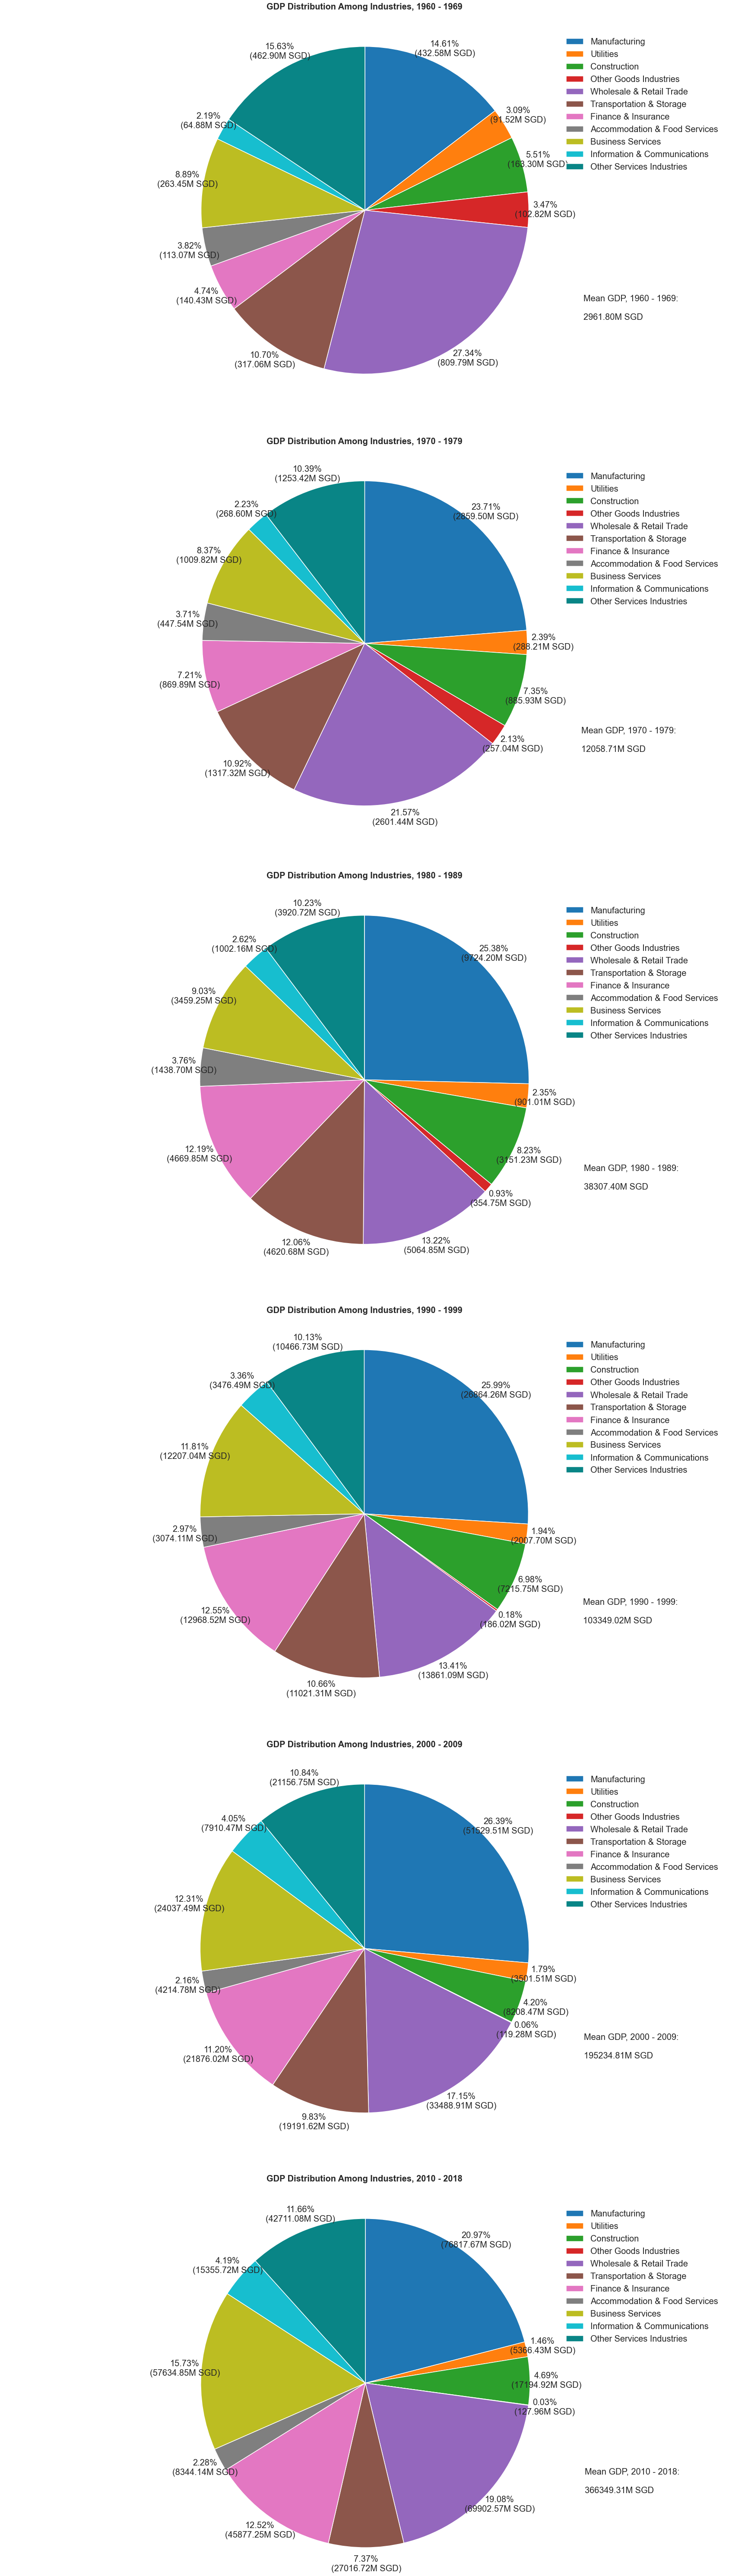

In [24]:
# Function to calculate the percentage of values in dataframes
def data_format (pct, data):
    data = (pct / 100) * data.sum().values[0]
    return "{:.2f}%\n({:.2f}M SGD)".format(pct, data)
fontSizes(20)

# Setting up the plots
plt.style.use("seaborn-dark")
num_rows = len(decades)
num_cols = 1
fig, ax_list = plt.subplots(num_rows, num_cols, figsize=(30, 108))

# Set colors to use
colors = ["C{}".format(i) for i in np.arange(10)] + ["#098586"]

# Plot the data
# Iterate over decades and plot data in each decade in different subplots
for ax, decade in zip(ax_list, decades):
    # Slice dataframe for data of decade
    economy_gdp_decade = economy_gdp.loc[decade, :]
    # Plotting the data
    ax.pie(economy_gdp_decade.values.flatten(), startangle=90, colors=colors, radius=3, counterclock=False, pctdistance=1.1, autopct=lambda pct: data_format(pct, economy_gdp_decade)) #matplotlib gives warning if data given isn't 1D array
    # Set details to make the graph easier to understand
    ax.set_title("GDP Distribution Among Industries, {}".format(decade), fontdict={"fontweight": "bold", "y": 1.05})
    ax.axis("equal")
    ax.annotate("Mean GDP, {}: \n\n{:.2f}M SGD".format(decade, economy_gdp_decade.sum().values[0]), (4,-2))
    # Set a legend for the subplot
    ax.legend(economy_gdp_decade.index, loc="upper right")

# Show plot
plt.show()


# Reset font sizes
fontSizes()

From the pie-charts produced, there are a few observations that could be made: 

* On the whole, Singapore's GDP is increasing by each decade.

* **Manufacturing**
    * The largest industry in terms of GDP contribution in 2010s.
    * Major contribution, contributes around a fifth and quarter of the GDP every decade, 1960s to 2010s.
    * Increases in dollars GDP contribution each decade, 1960s to 2010s.
    * Consistent increases in percentage GDP contribution each decade, 1960s to 2000s, but decreases in 2010s decade.

* **Utilities**
    * Minor contribution to the GDP compared to other industries every decade, 1960s to 2010s.
    * Increase in dollars GDP contribution each decade, 1960s to 2010s.
    * Consistent decrease in percentage GDP contribution each decade, 1960s to 2010s.

* **Construction**
    * Minor contribution to the GDP compared to other industries every decade, 1960s to 2010s.
    * Increase in dollars GDP contribution each decade, 1960s to 2010s.
    * Consistent increase in percentage GDP contribution, 1960s to 1980s. Then consistent decrease in percentage GDP contribution, 1990s to 2000s. Slight increase in 2010s.

* **Other Goods Industries**
    * The smallest industry in terms of GDP contribution from 1970s to 2010s.
    * Very minor contribution to the GDP compared to other industries every decade, 1960s to 2010s.
        * Comparable to Utilities industry in 1960s, but decreased in size afterwards.
    * Overall decrease in dollars GDP contrbution from 1960s to 2010s. 
        * Sharpest decrease from 1980s to 1990s.
        * The only industry in this pie chart to have decreasing dollars GDP contribution.
    * Percentage GDP contributions decreases each decade, 1960s to 2010s.
        * Sharpest decreases from 1960s to 1970s, and 1970s to 1980s. 
        * Contributions to GDP so minor in 2000s and 2010s it only appears as a sliver in the their respective pie-charts.

* **Wholesale & Retail Trade**
    * The largest industry in terms of GDP contribution in 1960s.
    * Major contribution from 1960s to 1970s, then decreases to moderate contribution afterwards before increasing again from 1980s to 2010s.
    * Increases in dollars GDP contribution each decade, 1960s to 2010s.
    * Sharp decrease in percentage GDP contribution, 1960s to 1980s. Then consistent increase in percentage GDP contribution, 1990s to 2010s.

* **Transportation & Storage**
    * Moderate contribution to the GDP compared to other industries every decade, 1960s to 2010s.
    * Increases in dollars GDP contribution each decade, 1960s to 2010s.
    * Consistent increase in percentage GDP contribution, 1960s to 1980s. Then consistent decrease in percentage GDP contribution, 1990s to 2010s.

* **Finance & Insurance**
    * Moderate contribution to the GDP compared to other industries every decade, 1960s to 2010s.
    * Increases in dollars GDP contribution each decade, 1960s to 2010s.
    * Increase in percentage GDP from 1960s to 1970s, then consistent percentage GDP with minor fluctuations from 1970s to 2010s.

* **Accommodation and Food Services**
    * Minor contribution to the GDP compared to other industries every decade, 1960s to 2010s.
    * Increase in dollars GDP contribution each decade, 1960s to 2010s.
    * Consistent decrease in percentage GDP contribution each decade, 1960s to 2010s.

* **Business Services**
    * Moderate contribution from 1960s to 2000s, then increases to major contribution in 2010s.
    * Increase in dollars GDP contribution each decade, 1960s to 2010s.
    * Consistent increase in percentage GDP contribution each decade, 1960s to 2010s.

* **Information & Communications**
    * Minor contribution to the GDP compared to other industries every decade, 1960s to 2010s.
    * Increase in dollars GDP contribution each decade, 1960s to 2010s.
    * Consistent increase in percentage GDP contribution each decade, 1960s to 2010s.

* **Other Services Industries**
    * Major contribution to the GDP in 1960s, but became only moderate contribution from 1970s to 2010s.
    * Increase in dollars GDP contribution each decade, 1960s to 2010s.
    * Significant decrease in percentage GDP contribution from 1960s to 1970s, consistent increase in percentage GDP contribution afterwards, 1970s to 2010s.

Insights gained:

* Singapore's economy is experiencing growth every decade.
* Large difference between industries in percentage GDP contribution.
* On the whole, Manufacturing and Wholesale & Retail Trade industries are the largest contributors to Singapore's GDP.
* On the whole, Utilities, Other Goods Industries, Accommodation & Food Services, and Information and Communications industries are the smallest contributors to Singapore's GDP.
* The Other Goods Industries were struggling since they contributed little to Singapore's GDP, and the contribution decreased by the decades.
* The GDP percentage contribution of industries in Singapore varies much between decades, which tells when they were prospering or struggling.

### Conclusion

From the analysis of the economy in Singapore, conclusions can be asked to answer the questions asked at the beginning of this data analysis.

#### How well does the income of Singaporeans keep up with Singapore's inflation rate?

From the line chart graphs plotted in the "Average Income and Inflation" section, both inflation and income in Singapore were increasing. However, the income increased more in percentage than inflation did. Both eventually became mostly constant.

This shows that for the average Singaporean, their income has kept up more than enough to compensate for the inflation of prices of goods over the years. Their lives are becoming easier as they could spend a smaller proportion of their income on basic things like food or housing, and have more money leftover.

#### How has the Gross Domestic Product (GDP) contribution of industries in Singapore changed over different time periods?

From the pie-chart graphs plotted in the "Industries' Contribution Towards GDP" section, the Singapore GDP is steadily growing. However, there is quite a large disparity between the largest and smallest industries in how much they contribute to the GDP in each decade. This disparity shifts between industries as the percentage GDP contribution of some industries changes a lot between each decade. However, there were also some industries that maintained the same percentage GDP contribution over the decades.

This shows that though the Singapore's GDP is increasing over the time periods, not every industry within Singapore is contributing equally. Their contribution not only depends on the nature of the industries, but also their capabilities to produce, which changes over the decades. Generally, the percentage GDP contribution of the industries remain at about the same range, like with the Manufacturing industry contributing 20-25%, but there are also exceptions. One example being the Wholesale & Retail Trade, decreasing by over half in 2 decades from 1960s to 1980s. 